# 🚗 Vehicle Insurance Claims Fraud Detection  

## 📌 Project Overview  
Insurance fraud is a major challenge in the industry, leading to financial losses and inefficiencies.  
This project focuses on **detecting fraudulent claims** in vehicle insurance datasets using machine learning models.  
The dataset used is **`fraud_oracle.csv`**, which contains various categorical and numerical features about policyholders, vehicles, and claims.  

---

## 📂 Dataset Description  
The dataset includes **policy, vehicle, and claim-related attributes**.  
Target variable: **`FraudFound_P`** (0 = Not Fraud, 1 = Fraud).  

### 🔑 Key Features  
- **Policy Information**: `PolicyType`, `BasePolicy`, `PolicyNumber`, `Deductible`  
- **Claim Information**: `AccidentArea`, `DayOfWeekClaimed`, `MonthClaimed`, `Days_Policy_Claim`  
- **Customer Information**: `Sex`, `MaritalStatus`, `Age`, `AgeOfPolicyHolder`, `AddressChange_Claim`  
- **Vehicle Information**: `Make`, `VehicleCategory`, `VehiclePrice`, `AgeOfVehicle`  
- **Fraud Indicators**: `PoliceReportFiled`, `WitnessPresent`, `PastNumberOfClaims`  

📊 Example entries:  

| Make   | AccidentArea | PolicyType          | VehicleCategory | VehiclePrice      | FraudFound_P |
|--------|-------------|---------------------|----------------|------------------|--------------|
| Honda  | Urban       | Sport - Liability   | Sport          | more than 69000  | 0            |
| Toyota | Rural       | Sedan - Liability   | Sedan          | 20000 to 29000   | 0            |

---

## ⚙️ Data Preprocessing  
1. **Handling Categorical Data**  
   - Encoded features like `Make`, `PolicyType`, `AccidentArea`, etc. using Label Encoding / One-Hot Encoding.  

2. **Handling Numerical Data**  
   - Standardized with **`StandardScaler`** for features like `Age`, `DriverRating`, `Deductible`.  

3. **Balancing Data**  
   - Fraud cases are usually **imbalanced**.  
   - Applied **SMOTE (Synthetic Minority Oversampling Technique)** to upsample fraud cases.  

   ```python
   from imblearn.over_sampling import SMOTE
   smote = SMOTE()
   X_train, y_train = smote.fit_resample(X_train, y_train)

4. **Dimensionality Reduction**
    - Applied PCA (Principal Component Analysis) to reduce dimensionality and avoid overfitting.


## 🤖 Machine Learning Models  

Several models were tested for fraud detection:  
- 🌳 Decision Tree  
- 🌲 Random Forest  
- 🌲✨ Extra Trees  
- 📈 Gradient Boosting  
- ⚡ **XGBoost (Best Performance)**  
- 📊 Support Vector Classifier (SVC)  

---

## 📊 Model Comparison  

Performance was evaluated based on **Accuracy, Precision, Recall, and F1-score**.  

| Model                     | Score (%) |
|----------------------------|-----------|
| 🌳 Decision Tree           | ~85%      |
| 🌲 Random Forest           | ~90%      |
| 🌲✨ Extra Trees           | ~91%      |
| 📈 Gradient Boost          | ~92%      |
| ⚡ **XGBoost**             | **94%**   |
| 📊 Support Vector Classifier | ~88%    |

✅ **XGBoost achieved the best accuracy and recall**, making it the most reliable model for fraud detection.  

---

## 🔎 Feature Importance (from XGBoost)  

Top contributing features:  
- 🚗 **VehiclePrice**  
- 📄 **PolicyType**  
- 👤 **AgeOfPolicyHolder**  
- 📅 **Days_Policy_Accident**  
- 🚓 **PoliceReportFiled**  

---

## ✅ Conclusion  

- The **XGBoost model** is the most effective in detecting fraudulent claims.  
- Fraud detection can significantly reduce insurance losses and speed up claim verification.  

### 🔮 Future Work  
- Add external datasets (credit score, fraud history).  
- Try **ensemble stacking** with multiple models.  
- Explore **deep learning approaches** for representation learning.  

In [ ]:
# Import file yang akan digunakan, dalam hal ini merupakan file ** fraud_oracle.csv **
from google.colab import files
uploades = files.upload()

Saving fraud_oracle.csv to fraud_oracle.csv


In [ ]:
# Import libraries yang akan digunakan
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
# Pengubahan pengaturan Pandas
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
# Definisikan variabel df sebagai data yang digunakan
df = pd.read_csv('fraud_oracle.csv')

In [ ]:
 df.head(10)

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21,Policy Holder,Sport - Liability,Sport,more than 69000,0,1,12,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34,Policy Holder,Sport - Collision,Sport,more than 69000,0,2,15,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,47,Policy Holder,Sport - Collision,Sport,more than 69000,0,3,7,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,65,Third Party,Sedan - Liability,Sport,20000 to 29000,0,4,4,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,27,Third Party,Sport - Collision,Sport,more than 69000,0,5,3,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision
5,Oct,4,Friday,Honda,Urban,Wednesday,Nov,1,Male,Single,20,Third Party,Sport - Collision,Sport,more than 69000,0,6,12,400,3,more than 30,more than 30,none,5 years,21 to 25,No,No,External,3 to 5,no change,1 vehicle,1994,Collision
6,Feb,1,Saturday,Honda,Urban,Monday,Feb,3,Male,Married,36,Third Party,Sport - Collision,Sport,more than 69000,0,7,14,400,1,more than 30,more than 30,1,7 years,36 to 40,No,No,External,1 to 2,no change,1 vehicle,1994,Collision
7,Nov,1,Friday,Honda,Urban,Tuesday,Mar,4,Male,Single,0,Policy Holder,Sport - Collision,Sport,more than 69000,0,8,1,400,4,more than 30,more than 30,1,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,Collision
8,Dec,4,Saturday,Honda,Urban,Wednesday,Dec,5,Male,Single,30,Policy Holder,Sport - Collision,Sport,more than 69000,0,9,7,400,4,more than 30,more than 30,none,6 years,31 to 35,No,Yes,External,3 to 5,no change,1 vehicle,1994,Collision
9,Apr,3,Tuesday,Ford,Urban,Wednesday,Apr,3,Male,Married,42,Policy Holder,Utility - All Perils,Utility,more than 69000,0,10,7,400,1,more than 30,more than 30,2 to 4,more than 7,36 to 40,No,No,External,3 to 5,no change,1 vehicle,1994,All Perils


In [ ]:
#Cek tipe data pada masing kategori
df.dtypes

Month                   object
WeekOfMonth              int64
DayOfWeek               object
Make                    object
AccidentArea            object
DayOfWeekClaimed        object
MonthClaimed            object
WeekOfMonthClaimed       int64
Sex                     object
MaritalStatus           object
Age                      int64
Fault                   object
PolicyType              object
VehicleCategory         object
VehiclePrice            object
FraudFound_P             int64
PolicyNumber             int64
RepNumber                int64
Deductible               int64
DriverRating             int64
Days_Policy_Accident    object
Days_Policy_Claim       object
PastNumberOfClaims      object
AgeOfVehicle            object
AgeOfPolicyHolder       object
PoliceReportFiled       object
WitnessPresent          object
AgentType               object
NumberOfSuppliments     object
AddressChange_Claim     object
NumberOfCars            object
Year                     int64
BasePoli

In [ ]:
# Mencari nilai yang kosong
df.isnull().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

In [ ]:
#Mengecek apakah terdapat data yang merupakan duplikat
df[df.duplicated()]

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy


In [ ]:
#Mencari jumlah data yang berbeda
df.nunique()

Month                      12
WeekOfMonth                 5
DayOfWeek                   7
Make                       19
AccidentArea                2
DayOfWeekClaimed            8
MonthClaimed               13
WeekOfMonthClaimed          5
Sex                         2
MaritalStatus               4
Age                        66
Fault                       2
PolicyType                  9
VehicleCategory             3
VehiclePrice                6
FraudFound_P                2
PolicyNumber            15420
RepNumber                  16
Deductible                  4
DriverRating                4
Days_Policy_Accident        5
Days_Policy_Claim           4
PastNumberOfClaims          4
AgeOfVehicle                8
AgeOfPolicyHolder           9
PoliceReportFiled           2
WitnessPresent              2
AgentType                   2
NumberOfSuppliments         4
AddressChange_Claim         5
NumberOfCars                5
Year                        3
BasePolicy                  3
dtype: int

In [ ]:
#Mencari perbandingan jumlah fraud found (1 = ada, 0 = tidak)
df.FraudFound_P.value_counts()

0    14497
1      923
Name: FraudFound_P, dtype: int64

### **Statistik Deskriptif**


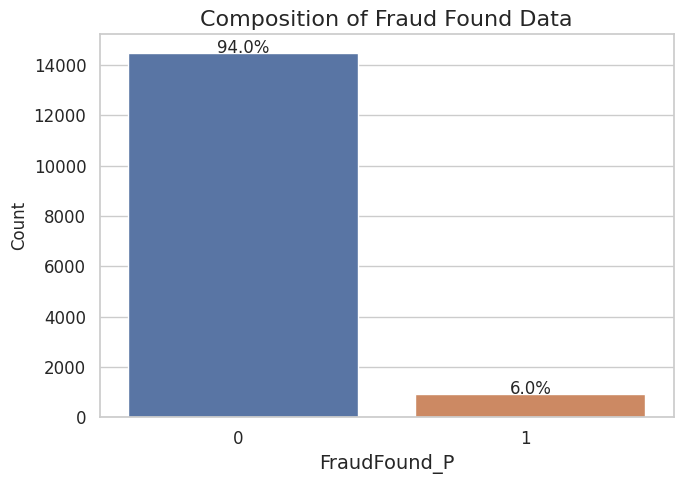

In [ ]:
sns.set(style='whitegrid')
plt.figure(figsize =(7,5))
ax = sns.countplot(data = df, x = 'FraudFound_P')
plt.xticks(size = 12)
plt.xlabel('FraudFound_P', size = 14)
plt.yticks(size = 12)
plt.ylabel('Count', size = 12)
plt.title("Composition of Fraud Found Data", size = 16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="right");

total = len(df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center')
plt.tight_layout()
plt.show()

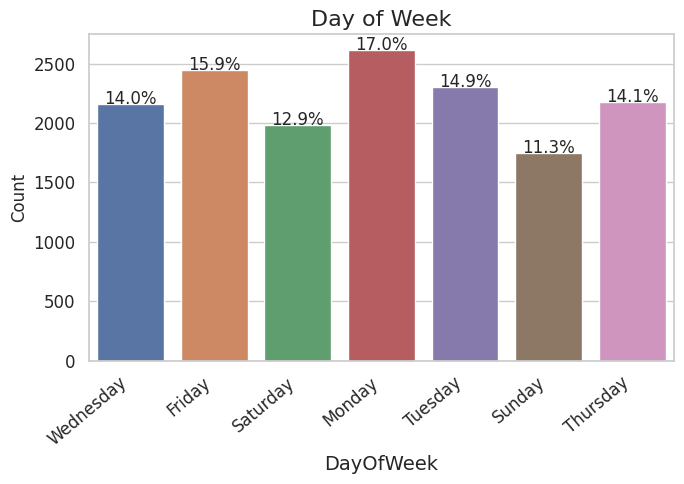

In [ ]:
plt.figure(figsize =(7,5))
ax = sns.countplot(data = df, x = 'DayOfWeek')
plt.xticks(size = 12)
plt.xlabel('DayOfWeek', size = 14)
plt.yticks(size = 12)
plt.ylabel('Count', size = 12)
plt.title("Day of Week", size = 16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right");

total =len(df)
i=0
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center')
    i += 1
plt.tight_layout()
plt.show()

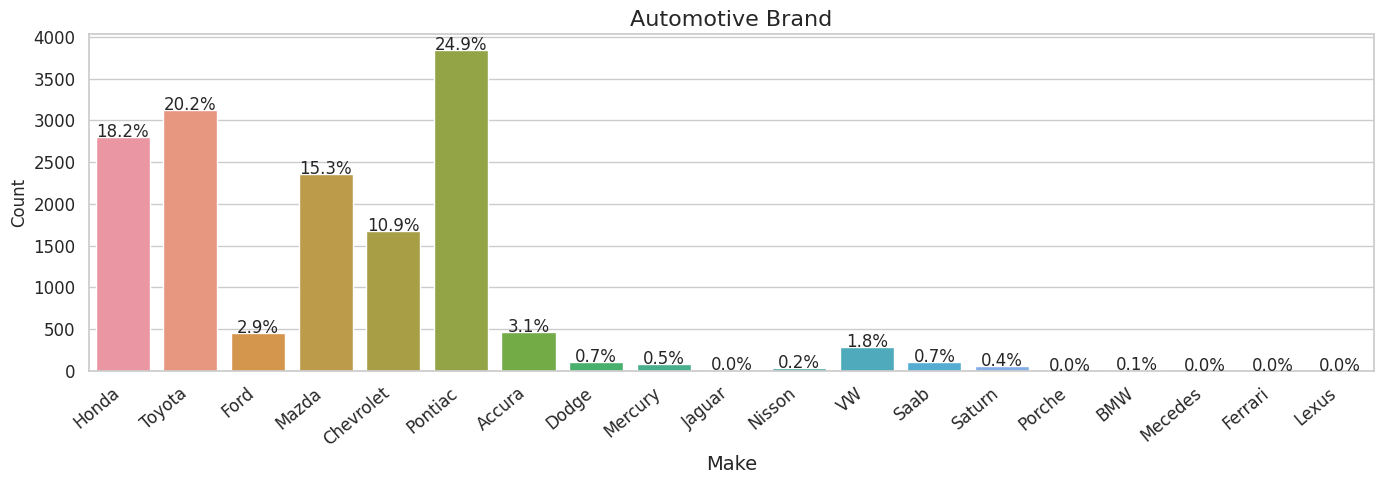

In [ ]:
plt.figure(figsize =(14,5))
ax = sns.countplot(data = df, x = 'Make')
plt.xticks(size = 12)
plt.xlabel('Make', size = 14)
plt.yticks(size = 12)
plt.ylabel('Count', size = 12)
plt.title("Automotive Brand", size = 16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right");

total =len(df)
i=0
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center')
    i += 1
plt.tight_layout()
plt.show()

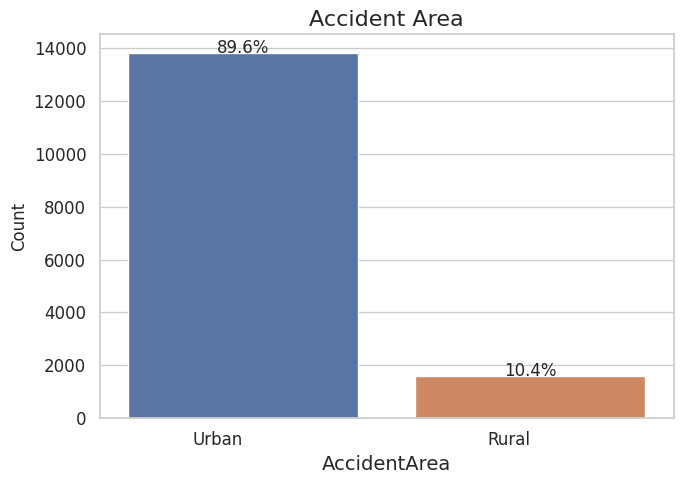

In [ ]:
plt.figure(figsize =(7,5))
ax = sns.countplot(data = df, x = 'AccidentArea')
plt.xticks(size = 12)
plt.xlabel('AccidentArea', size = 14)
plt.yticks(size = 12)
plt.ylabel('Count', size = 12)
plt.title("Accident Area", size = 16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="right");

total =len(df)
i=0
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center')
    i += 1
plt.tight_layout()
plt.show()

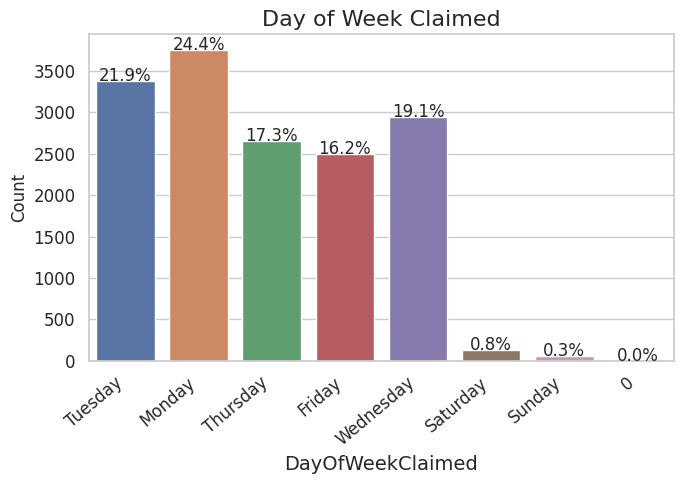

In [ ]:
plt.figure(figsize =(7,5))
ax = sns.countplot(data = df, x = 'DayOfWeekClaimed')
plt.xticks(size = 12)
plt.xlabel('DayOfWeekClaimed', size = 14)
plt.yticks(size = 12)
plt.ylabel('Count', size = 12)
plt.title("Day of Week Claimed", size = 16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right");

total =len(df)
i=0
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center')
    i += 1
plt.tight_layout()
plt.show()

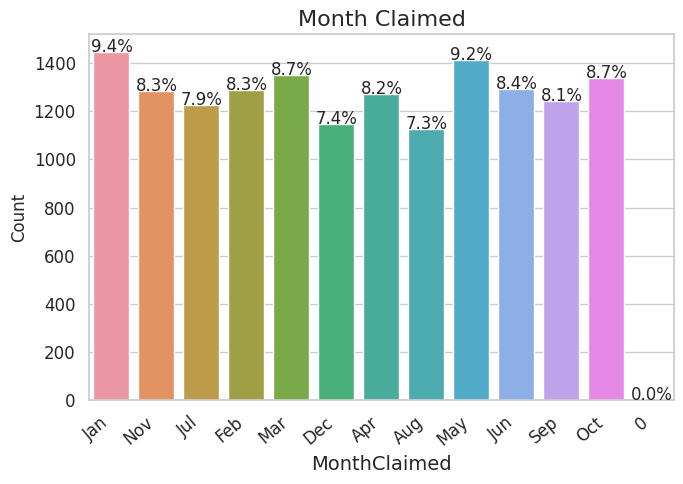

In [ ]:
plt.figure(figsize =(7,5))
ax = sns.countplot(data = df, x = 'MonthClaimed')
plt.xticks(size = 12)
plt.xlabel('MonthClaimed', size = 14)
plt.yticks(size = 12)
plt.ylabel('Count', size = 12)
plt.title("Month Claimed", size = 16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right");

total =len(df)
i=0
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center')
    i += 1
plt.tight_layout()
plt.show()

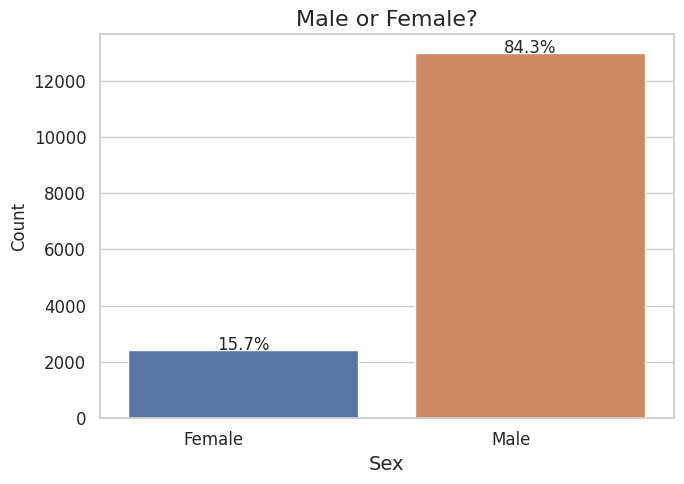

In [ ]:
plt.figure(figsize =(7,5))
ax = sns.countplot(data = df, x = 'Sex')
plt.xticks(size = 12)
plt.xlabel('Sex', size = 14)
plt.yticks(size = 12)
plt.ylabel('Count', size = 12)
plt.title("Male or Female?", size = 16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="right");

total =len(df)
i=0
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center')
    i += 1
plt.tight_layout()
plt.show()

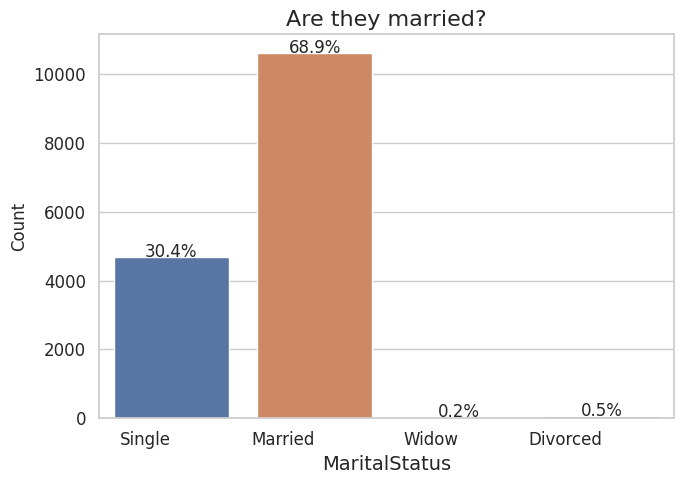

In [ ]:
plt.figure(figsize =(7,5))
ax = sns.countplot(data = df, x = 'MaritalStatus')
plt.xticks(size = 12)
plt.xlabel('MaritalStatus', size = 14)
plt.yticks(size = 12)
plt.ylabel('Count', size = 12)
plt.title("Are they married?", size = 16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="right");

total =len(df)
i=0
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center')
    i += 1
plt.tight_layout()
plt.show()

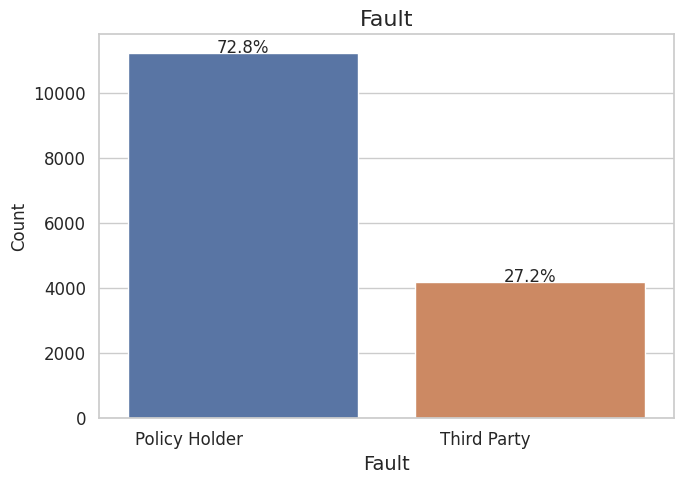

In [ ]:
plt.figure(figsize =(7,5))
ax = sns.countplot(data = df, x = 'Fault')
plt.xticks(size = 12)
plt.xlabel('Fault', size = 14)
plt.yticks(size = 12)
plt.ylabel('Count', size = 12)
plt.title("Fault", size = 16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="right");

total =len(df)
i=0
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center')
    i += 1
plt.tight_layout()
plt.show()

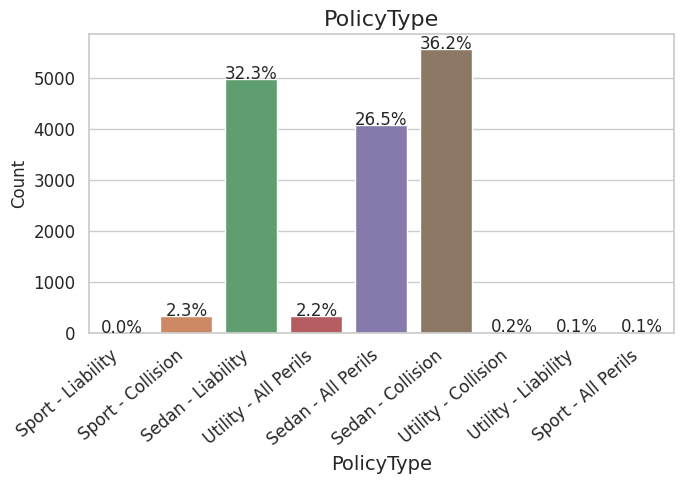

In [ ]:
plt.figure(figsize =(7,5))
ax = sns.countplot(data = df, x = 'PolicyType')
plt.xticks(size = 12)
plt.xlabel('PolicyType', size = 14)
plt.yticks(size = 12)
plt.ylabel('Count', size = 12)
plt.title("PolicyType", size = 16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right");

total =len(df)
i=0
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center')
    i += 1
plt.tight_layout()
plt.show()

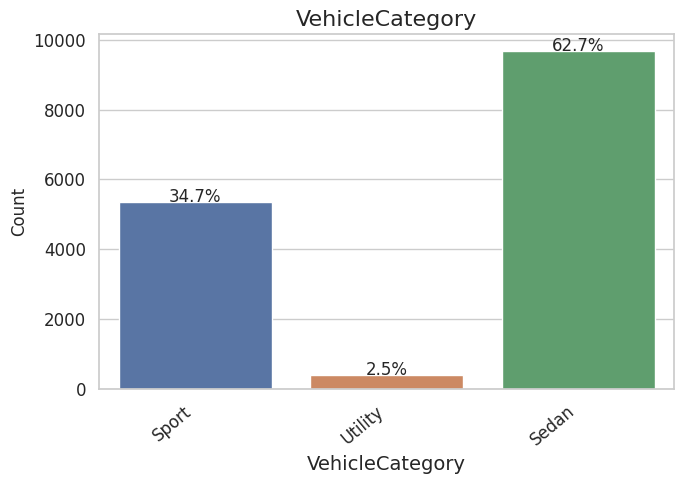

In [ ]:
plt.figure(figsize =(7,5))
ax = sns.countplot(data = df, x = 'VehicleCategory')
plt.xticks(size = 12)
plt.xlabel('VehicleCategory', size = 14)
plt.yticks(size = 12)
plt.ylabel('Count', size = 12)
plt.title("VehicleCategory", size = 16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right");

total =len(df)
i=0
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center')
    i += 1
plt.tight_layout()
plt.show()

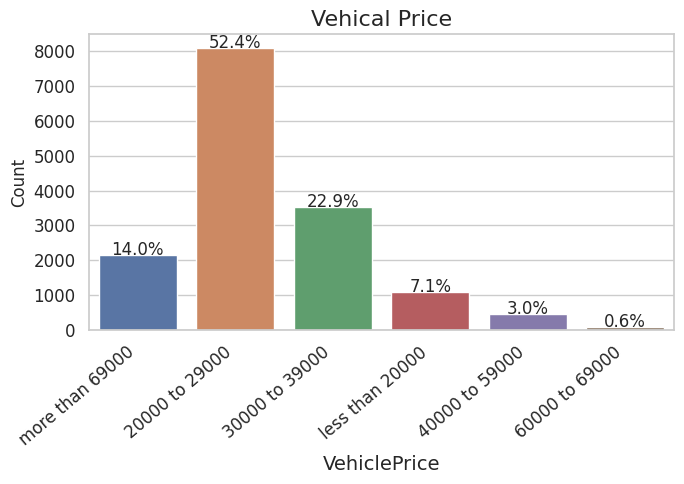

In [ ]:
plt.figure(figsize =(7,5))
ax = sns.countplot(data = df, x = 'VehiclePrice')
plt.xticks(size = 12)
plt.xlabel('VehiclePrice', size = 14)
plt.yticks(size = 12)
plt.ylabel('Count', size = 12)
plt.title("Vehical Price", size = 16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right");

total =len(df)
i=0
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center')
    i += 1
plt.tight_layout()
plt.show()

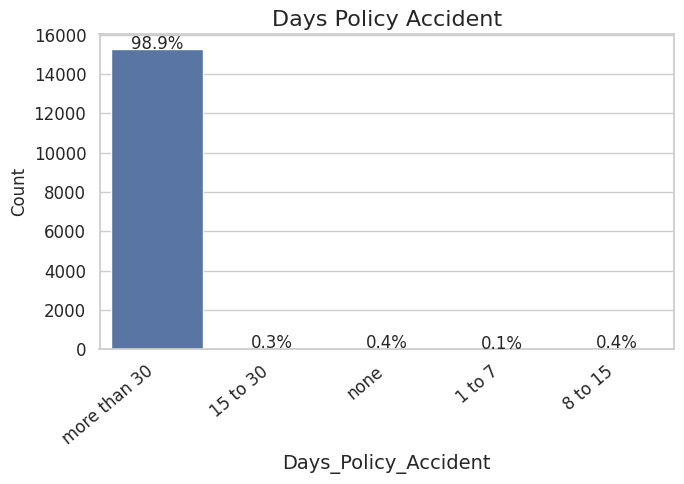

In [ ]:
plt.figure(figsize =(7,5))
ax = sns.countplot(data = df, x = 'Days_Policy_Accident')
plt.xticks(size = 12)
plt.xlabel('Days_Policy_Accident', size = 14)
plt.yticks(size = 12)
plt.ylabel('Count', size = 12)
plt.title("Days Policy Accident", size = 16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right");

total =len(df)
i=0
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center')
    i += 1
plt.tight_layout()
plt.show()

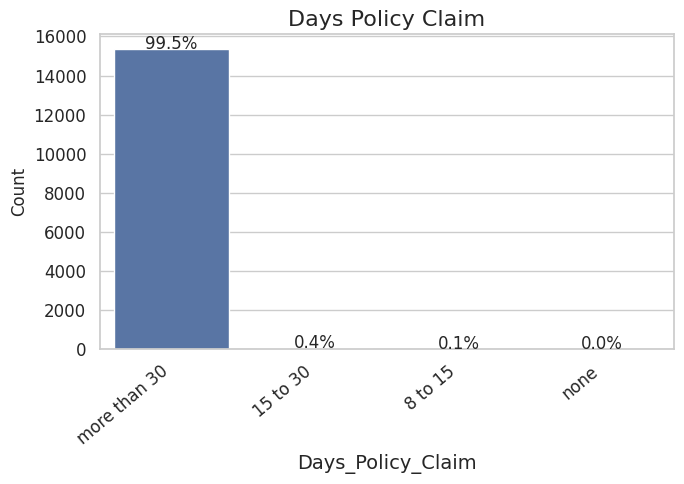

In [ ]:
plt.figure(figsize =(7,5))
ax = sns.countplot(data = df, x = 'Days_Policy_Claim')
plt.xticks(size = 12)
plt.xlabel('Days_Policy_Claim', size = 14)
plt.yticks(size = 12)
plt.ylabel('Count', size = 12)
plt.title("Days Policy Claim", size = 16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right");

total =len(df)
i=0
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center')
    i += 1
plt.tight_layout()
plt.show()

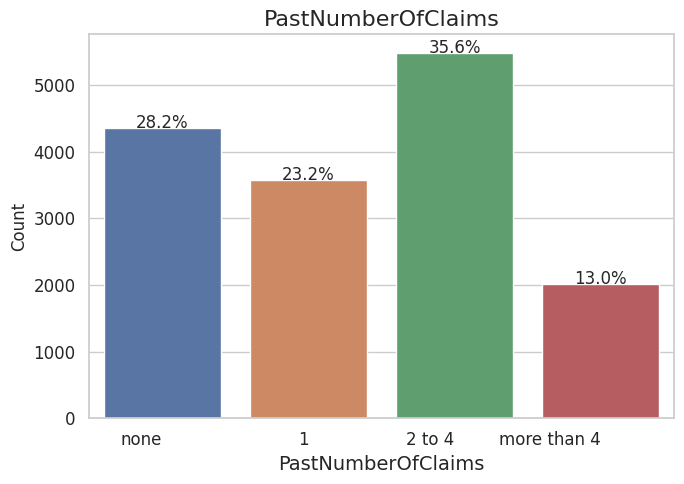

In [ ]:
plt.figure(figsize =(7,5))
ax = sns.countplot(data = df, x = 'PastNumberOfClaims')
plt.xticks(size = 12)
plt.xlabel('PastNumberOfClaims', size = 14)
plt.yticks(size = 12)
plt.ylabel('Count', size = 12)
plt.title("PastNumberOfClaims", size = 16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="right");

total =len(df)
i=0
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center')
    i += 1
plt.tight_layout()
plt.show()

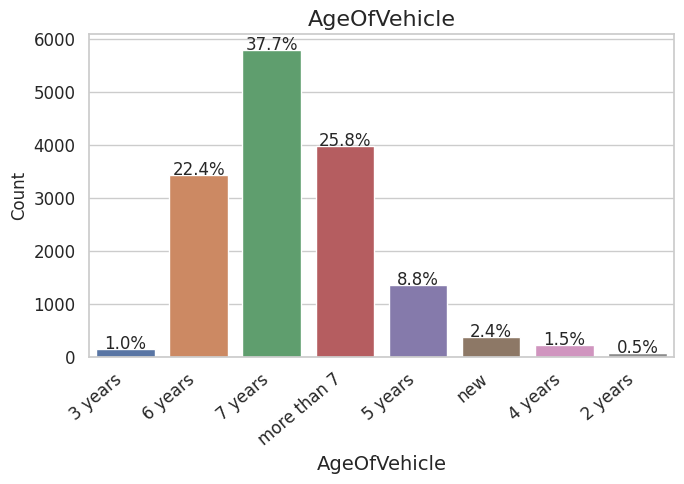

In [ ]:
plt.figure(figsize =(7,5))
ax = sns.countplot(data = df, x = 'AgeOfVehicle')
plt.xticks(size = 12)
plt.xlabel('AgeOfVehicle', size = 14)
plt.yticks(size = 12)
plt.ylabel('Count', size = 12)
plt.title("AgeOfVehicle", size = 16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right");

total =len(df)
i=0
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center')
    i += 1
plt.tight_layout()
plt.show()

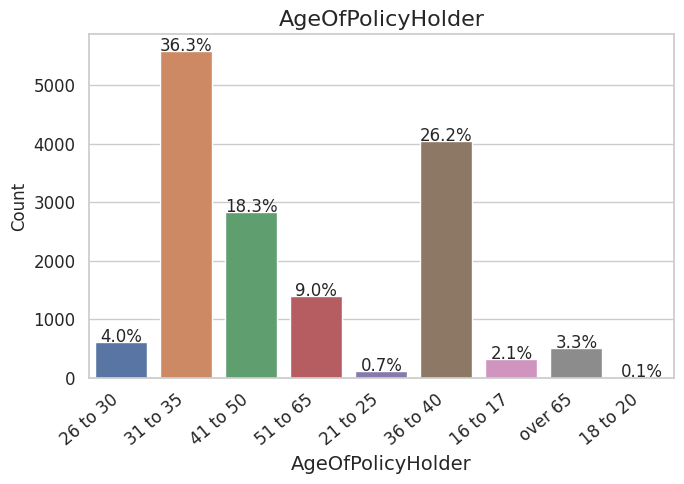

In [ ]:
plt.figure(figsize =(7,5))
ax = sns.countplot(data = df, x = 'AgeOfPolicyHolder')
plt.xticks(size = 12)
plt.xlabel('AgeOfPolicyHolder', size = 14)
plt.yticks(size = 12)
plt.ylabel('Count', size = 12)
plt.title("AgeOfPolicyHolder", size = 16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right");

total =len(df)
i=0
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center')
    i += 1
plt.tight_layout()
plt.show()

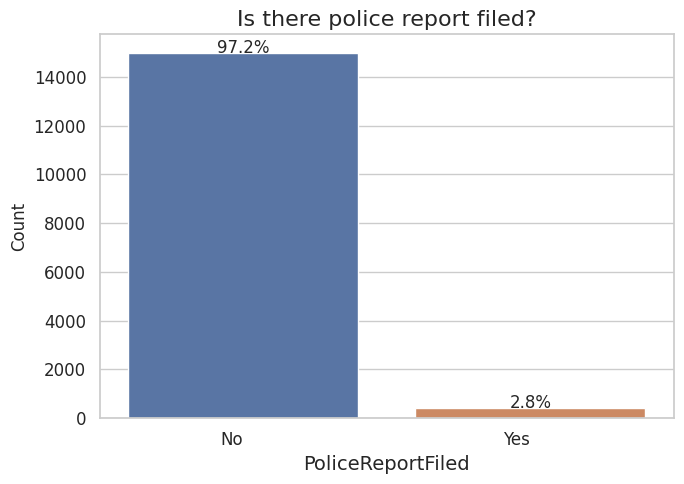

In [ ]:
plt.figure(figsize =(7,5))
ax = sns.countplot(data = df, x = 'PoliceReportFiled')
plt.xticks(size = 12)
plt.xlabel('PoliceReportFiled', size = 14)
plt.yticks(size = 12)
plt.ylabel('Count', size = 12)
plt.title("Is there police report filed?", size = 16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="right");

total =len(df)
i=0
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center')
    i += 1
plt.tight_layout()
plt.show()

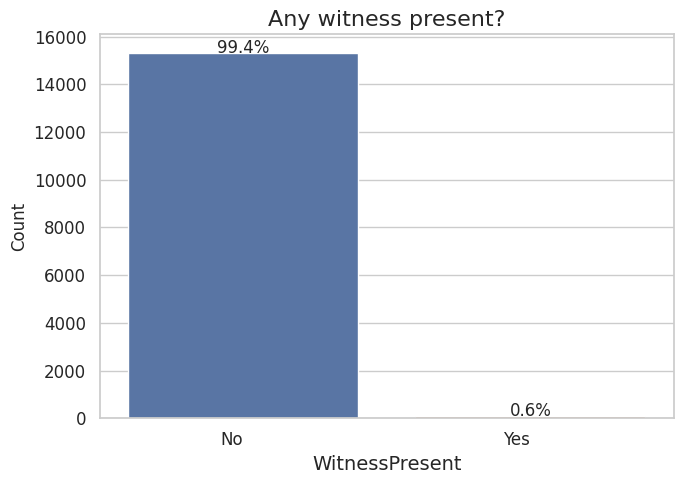

In [ ]:
plt.figure(figsize =(7,5))
ax = sns.countplot(data = df, x = 'WitnessPresent')
plt.xticks(size = 12)
plt.xlabel('WitnessPresent', size = 14)
plt.yticks(size = 12)
plt.ylabel('Count', size = 12)
plt.title("Any witness present?", size = 16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="right");

total =len(df)
i=0
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center')
    i += 1
plt.tight_layout()
plt.show()

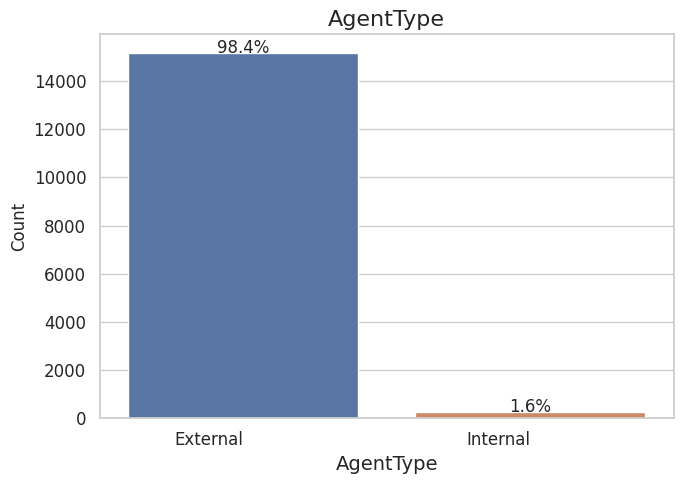

In [ ]:
plt.figure(figsize =(7,5))
ax = sns.countplot(data = df, x = 'AgentType')
plt.xticks(size = 12)
plt.xlabel('AgentType', size = 14)
plt.yticks(size = 12)
plt.ylabel('Count', size = 12)
plt.title("AgentType", size = 16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="right");

total =len(df)
i=0
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center')
    i += 1
plt.tight_layout()
plt.show()

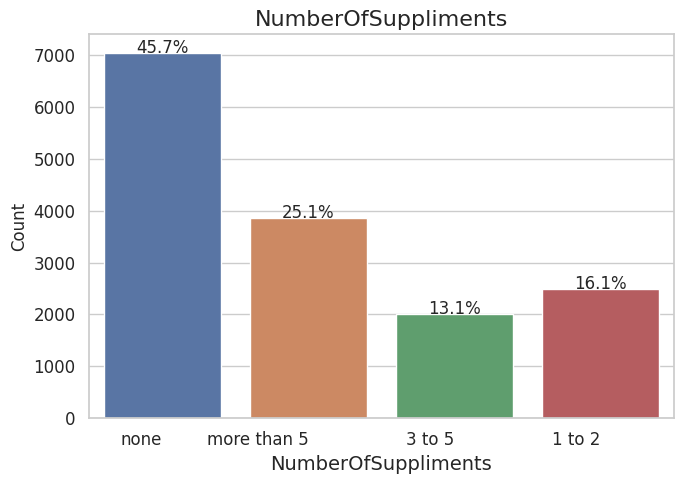

In [ ]:
plt.figure(figsize =(7,5))
ax = sns.countplot(data = df, x = 'NumberOfSuppliments')
plt.xticks(size = 12)
plt.xlabel('NumberOfSuppliments', size = 14)
plt.yticks(size = 12)
plt.ylabel('Count', size = 12)
plt.title("NumberOfSuppliments", size = 16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="right");

total =len(df)
i=0
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center')
    i += 1
plt.tight_layout()
plt.show()

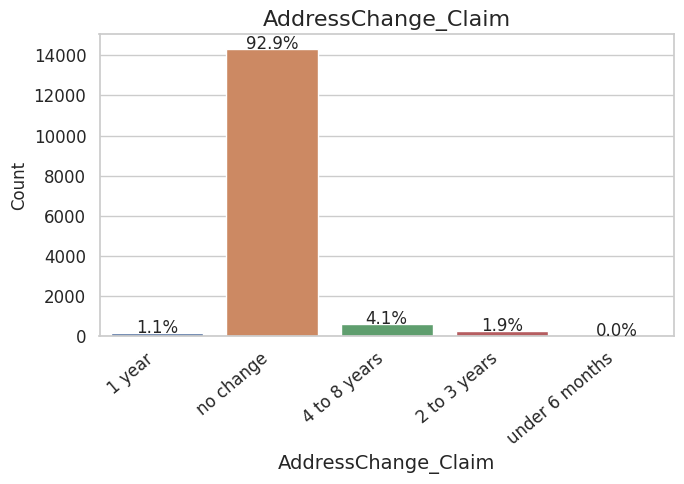

In [ ]:
plt.figure(figsize =(7,5))
ax = sns.countplot(data = df, x = 'AddressChange_Claim')
plt.xticks(size = 12)
plt.xlabel('AddressChange_Claim', size = 14)
plt.yticks(size = 12)
plt.ylabel('Count', size = 12)
plt.title("AddressChange_Claim", size = 16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right");

total =len(df)
i=0
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center')
    i += 1
plt.tight_layout()
plt.show()

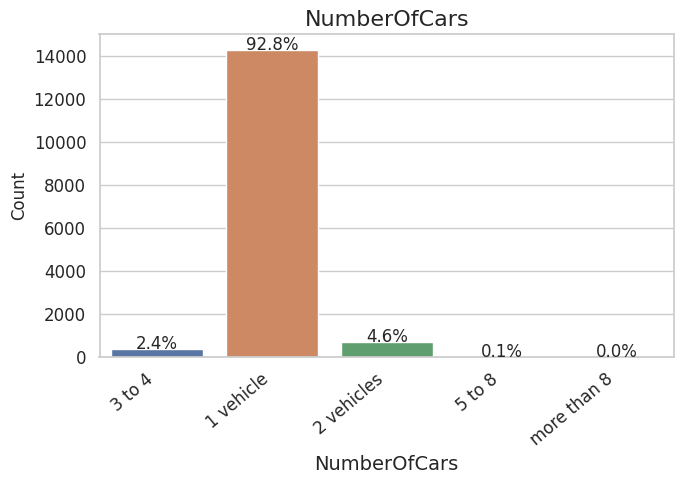

In [ ]:
plt.figure(figsize =(7,5))
ax = sns.countplot(data = df, x = 'NumberOfCars')
plt.xticks(size = 12)
plt.xlabel('NumberOfCars', size = 14)
plt.yticks(size = 12)
plt.ylabel('Count', size = 12)
plt.title("NumberOfCars", size = 16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right");

total =len(df)
i=0
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center')
    i += 1
plt.tight_layout()
plt.show()

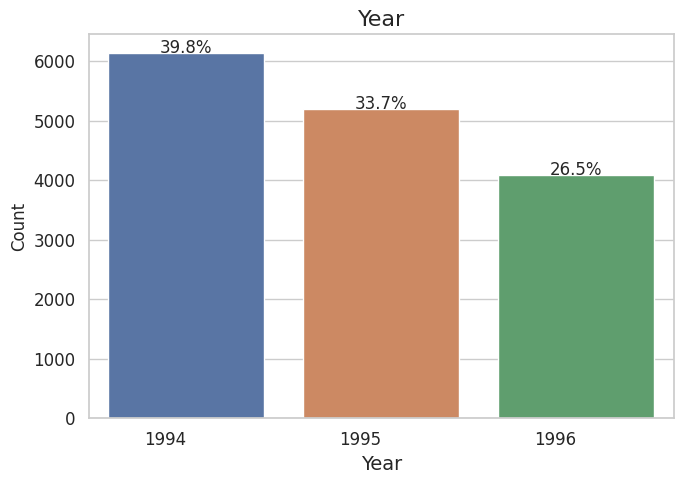

In [ ]:
plt.figure(figsize =(7,5))
ax = sns.countplot(data = df, x = 'Year')
plt.xticks(size = 12)
plt.xlabel('Year', size = 14)
plt.yticks(size = 12)
plt.ylabel('Count', size = 12)
plt.title("Year", size = 16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="right");

total =len(df)
i=0
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center')
    i += 1
plt.tight_layout()
plt.show()

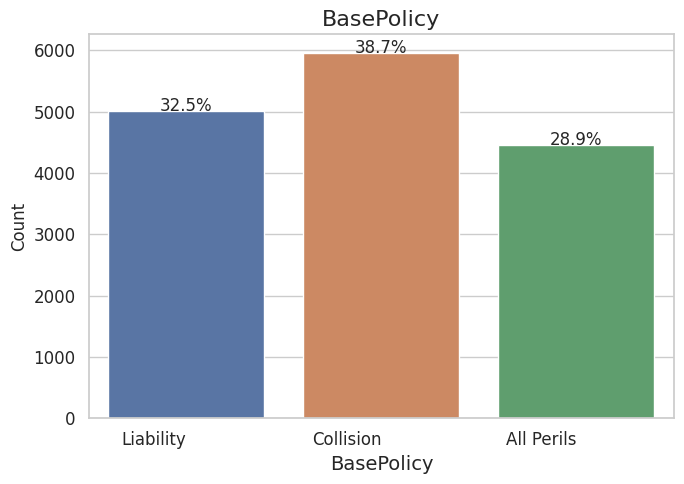

In [ ]:
plt.figure(figsize =(7,5))
ax = sns.countplot(data = df, x = 'BasePolicy')
plt.xticks(size = 12)
plt.xlabel('BasePolicy', size = 14)
plt.yticks(size = 12)
plt.ylabel('Count', size = 12)
plt.title("BasePolicy", size = 16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="right");

total =len(df)
i=0
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center')
    i += 1
plt.tight_layout()
plt.show()

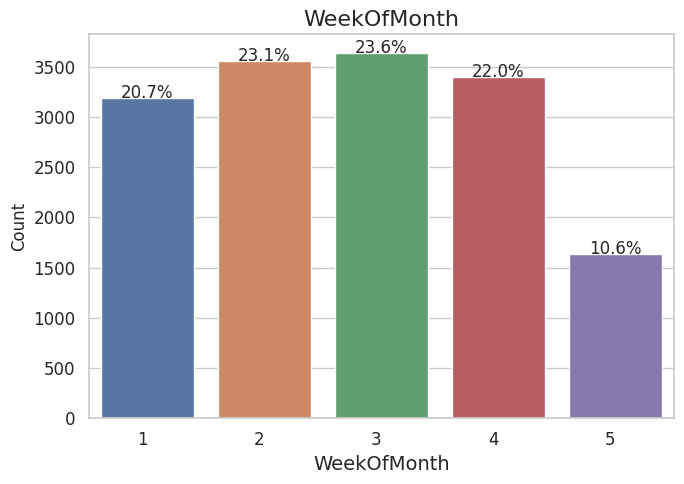

In [ ]:
plt.figure(figsize =(7,5))
ax = sns.countplot(data = df, x = 'WeekOfMonth')
plt.xticks(size = 12)
plt.xlabel('WeekOfMonth', size = 14)
plt.yticks(size = 12)
plt.ylabel('Count', size = 12)
plt.title("WeekOfMonth", size = 16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="right");

total =len(df)
i=0
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center')
    i += 1
plt.tight_layout()
plt.show()

<ipython-input-37-31c615c7447a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.WeekOfMonth)


<Axes: xlabel='WeekOfMonth', ylabel='Density'>

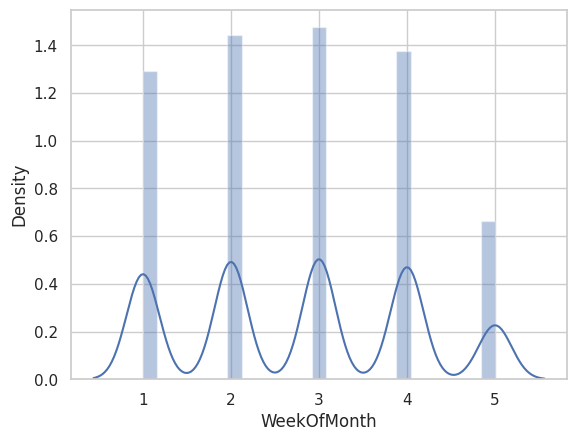

In [ ]:
sns.distplot(df.WeekOfMonth)

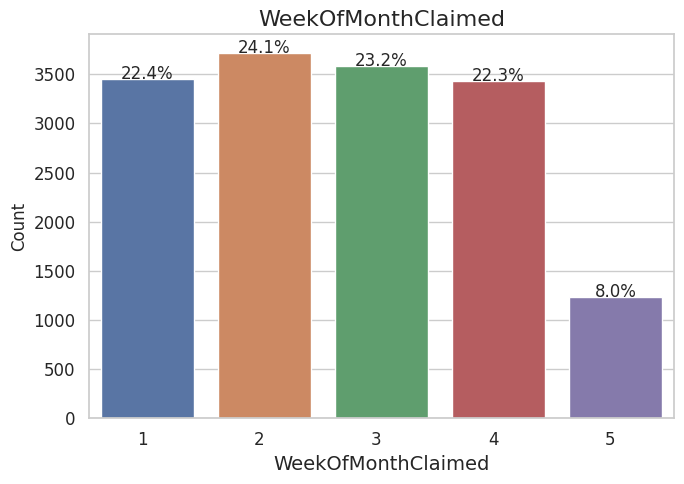

In [ ]:
plt.figure(figsize =(7,5))
ax = sns.countplot(data = df, x = 'WeekOfMonthClaimed')
plt.xticks(size = 12)
plt.xlabel('WeekOfMonthClaimed', size = 14)
plt.yticks(size = 12)
plt.ylabel('Count', size = 12)
plt.title("WeekOfMonthClaimed", size = 16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="right");

total =len(df)
i=0
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center')
    i += 1
plt.tight_layout()
plt.show()

<ipython-input-39-23f7b7db02dc>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.WeekOfMonthClaimed)


<Axes: xlabel='WeekOfMonthClaimed', ylabel='Density'>

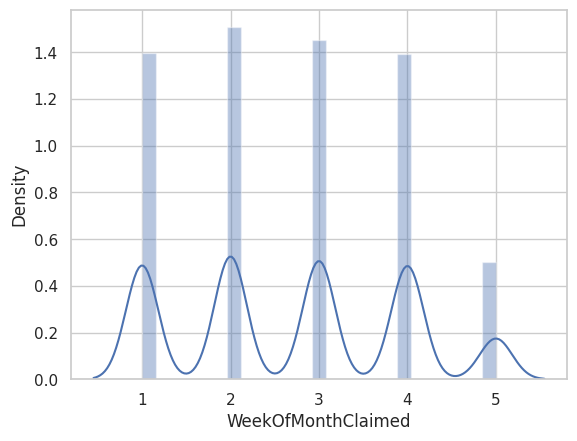

In [ ]:
sns.distplot(df.WeekOfMonthClaimed)

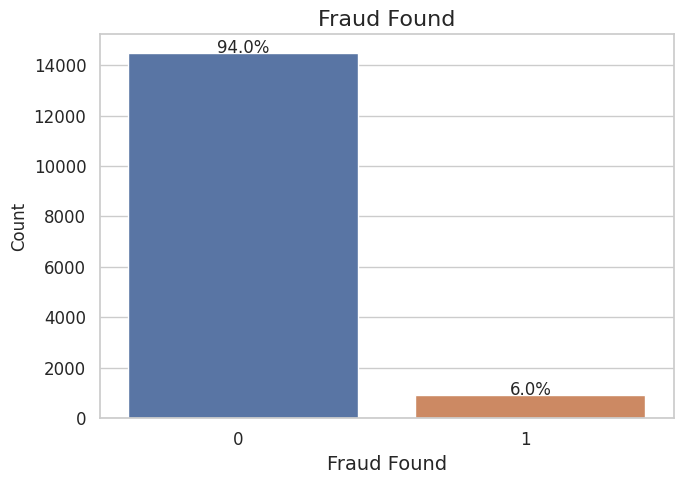

In [ ]:
plt.figure(figsize =(7,5))
ax = sns.countplot(data = df, x = 'FraudFound_P')
plt.xticks(size = 12)
plt.xlabel('Fraud Found', size = 14)
plt.yticks(size = 12)
plt.ylabel('Count', size = 12)
plt.title("Fraud Found", size = 16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="right");

total =len(df)
i=0
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center')
    i += 1
plt.tight_layout()
plt.show()

<ipython-input-41-bbb8ce78f701>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.FraudFound_P)


<Axes: xlabel='FraudFound_P', ylabel='Density'>

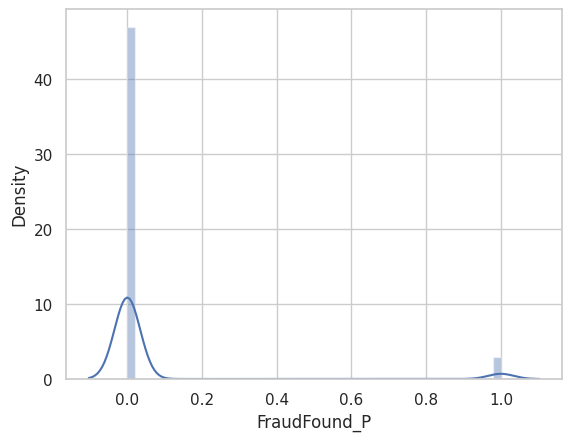

In [ ]:
sns.distplot(df.FraudFound_P)

<ipython-input-42-21a586e61507>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.PolicyNumber)


<Axes: xlabel='PolicyNumber', ylabel='Density'>

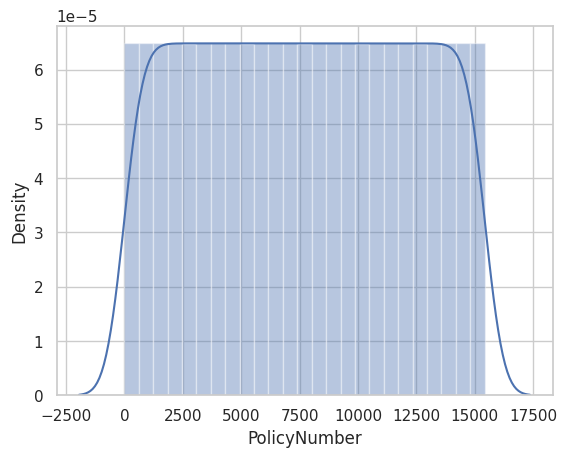

In [ ]:
sns.distplot(df.PolicyNumber)

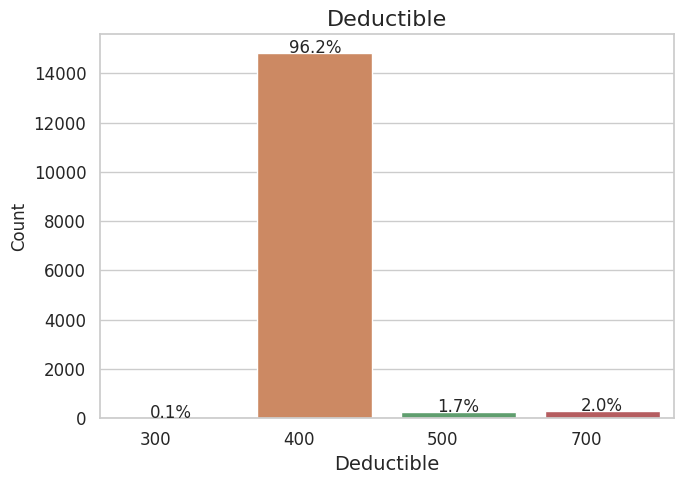

In [ ]:
plt.figure(figsize =(7,5))
ax = sns.countplot(data = df, x = 'Deductible')
plt.xticks(size = 12)
plt.xlabel('Deductible', size = 14)
plt.yticks(size = 12)
plt.ylabel('Count', size = 12)
plt.title("Deductible", size = 16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="right");

total =len(df)
i=0
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center')
    i += 1
plt.tight_layout()
plt.show()

<ipython-input-44-aab452311b78>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Deductible)


<Axes: xlabel='Deductible', ylabel='Density'>

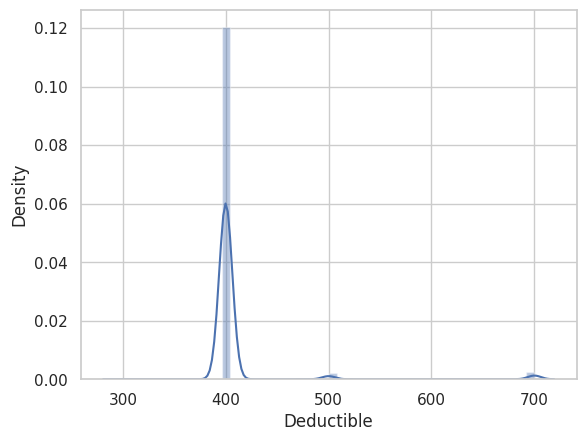

In [ ]:
sns.distplot(df.Deductible)

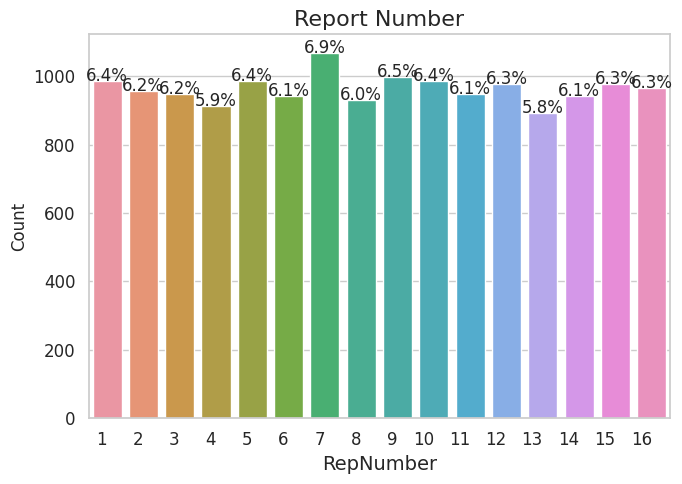

In [ ]:
plt.figure(figsize =(7,5))
ax = sns.countplot(data = df, x = 'RepNumber')
plt.xticks(size = 12)
plt.xlabel('RepNumber', size = 14)
plt.yticks(size = 12)
plt.ylabel('Count', size = 12)
plt.title("Report Number", size = 16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="right");

total =len(df)
i=0
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center')
    i += 1
plt.tight_layout()
plt.show()

<ipython-input-46-ed54307e97d6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.RepNumber)


<Axes: xlabel='RepNumber', ylabel='Density'>

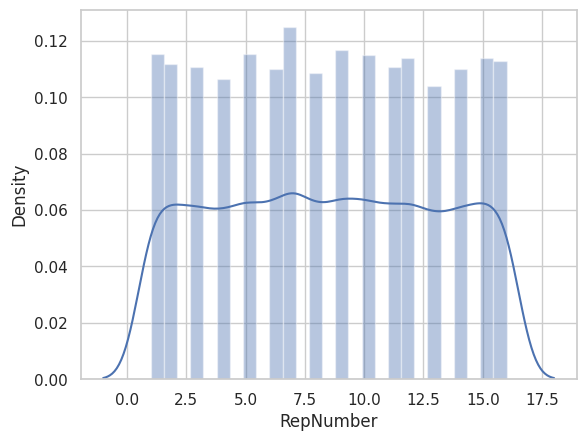

In [ ]:
sns.distplot(df.RepNumber)

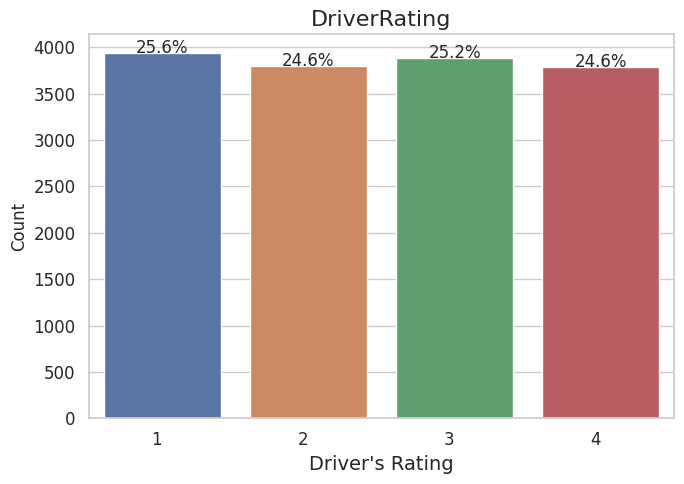

In [ ]:
plt.figure(figsize =(7,5))
ax = sns.countplot(data = df, x = 'DriverRating')
plt.xticks(size = 12)
plt.xlabel("Driver's Rating", size = 14)
plt.yticks(size = 12)
plt.ylabel('Count', size = 12)
plt.title("DriverRating", size = 16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="right");

total =len(df)
i=0
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center')
    i += 1
plt.tight_layout()
plt.show()

<ipython-input-48-703d3b49bfb3>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.DriverRating)


<Axes: xlabel='DriverRating', ylabel='Density'>

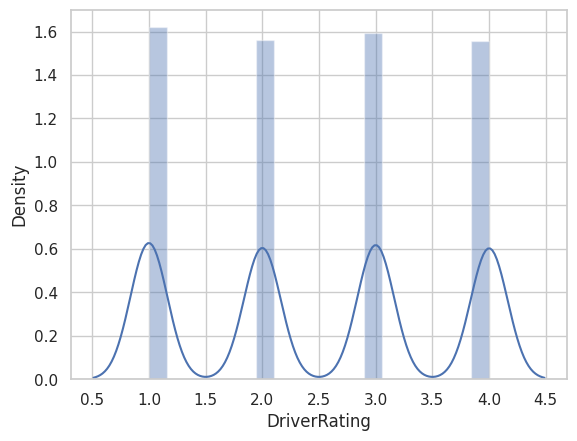

In [ ]:
sns.distplot(df.DriverRating)

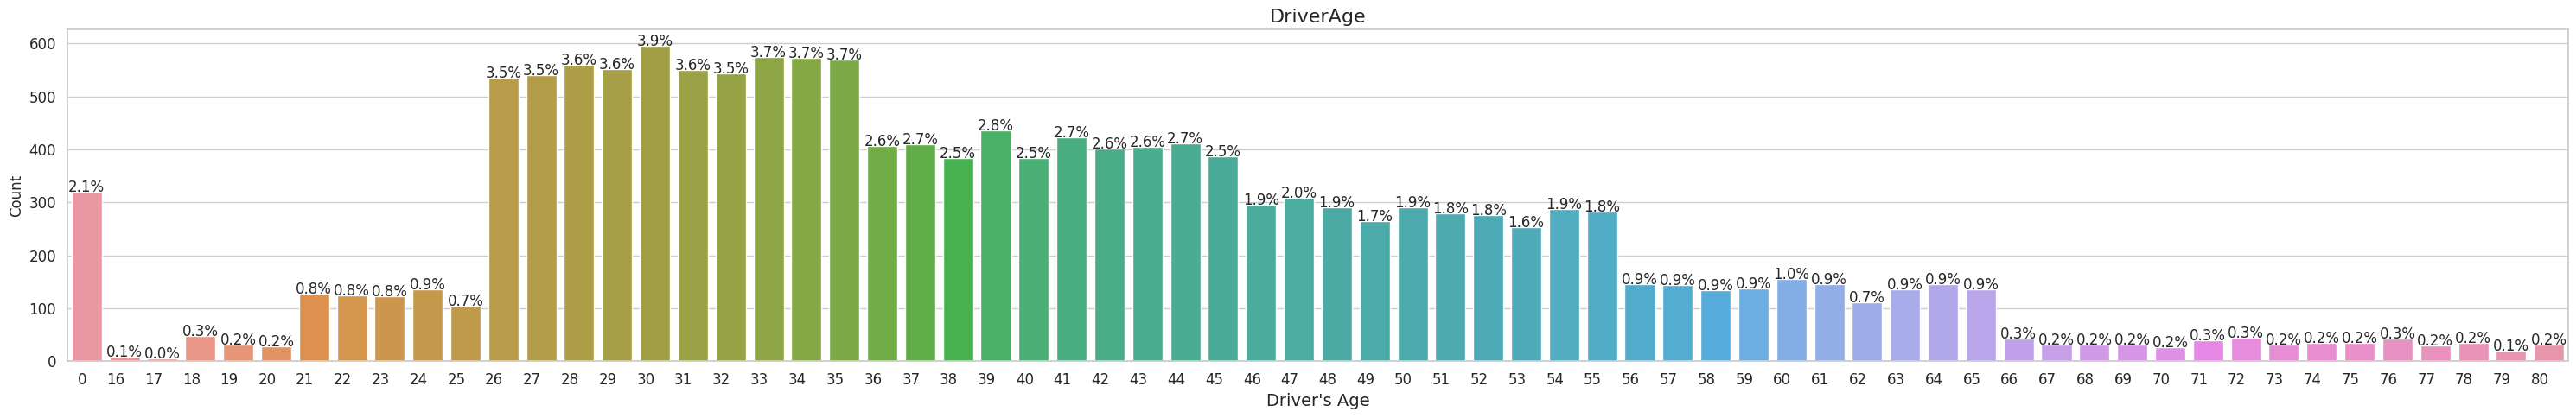

In [ ]:
plt.figure(figsize =(30,5))
ax = sns.countplot(data = df, x = 'Age')
plt.xticks(size = 12)
plt.xlabel("Driver's Age", size = 14)
plt.yticks(size = 12)
plt.ylabel('Count', size = 12)
plt.title("DriverAge", size = 16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="right");

total =len(df)
i=0
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center')
    i += 1
plt.tight_layout()
plt.show()

<ipython-input-50-b2378c9d8a20>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Age)


<Axes: xlabel='Age', ylabel='Density'>

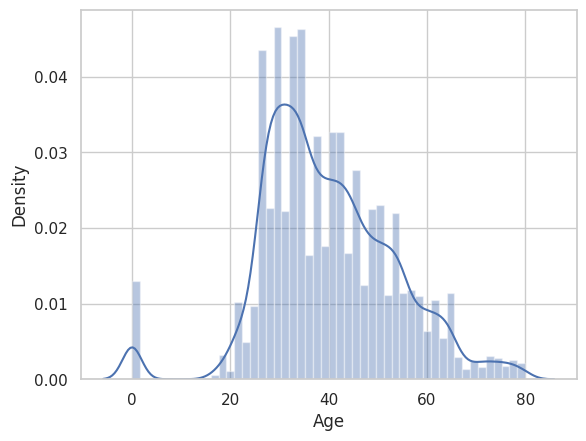

In [ ]:
sns.distplot(df.Age)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

array([[<Axes: title={'center': 'WeekOfMonth'}>,
        <Axes: title={'center': 'WeekOfMonthClaimed'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'FraudFound_P'}>,
        <Axes: title={'center': 'PolicyNumber'}>,
        <Axes: title={'center': 'RepNumber'}>],
       [<Axes: title={'center': 'Deductible'}>,
        <Axes: title={'center': 'DriverRating'}>,
        <Axes: title={'center': 'Year'}>]], dtype=object)

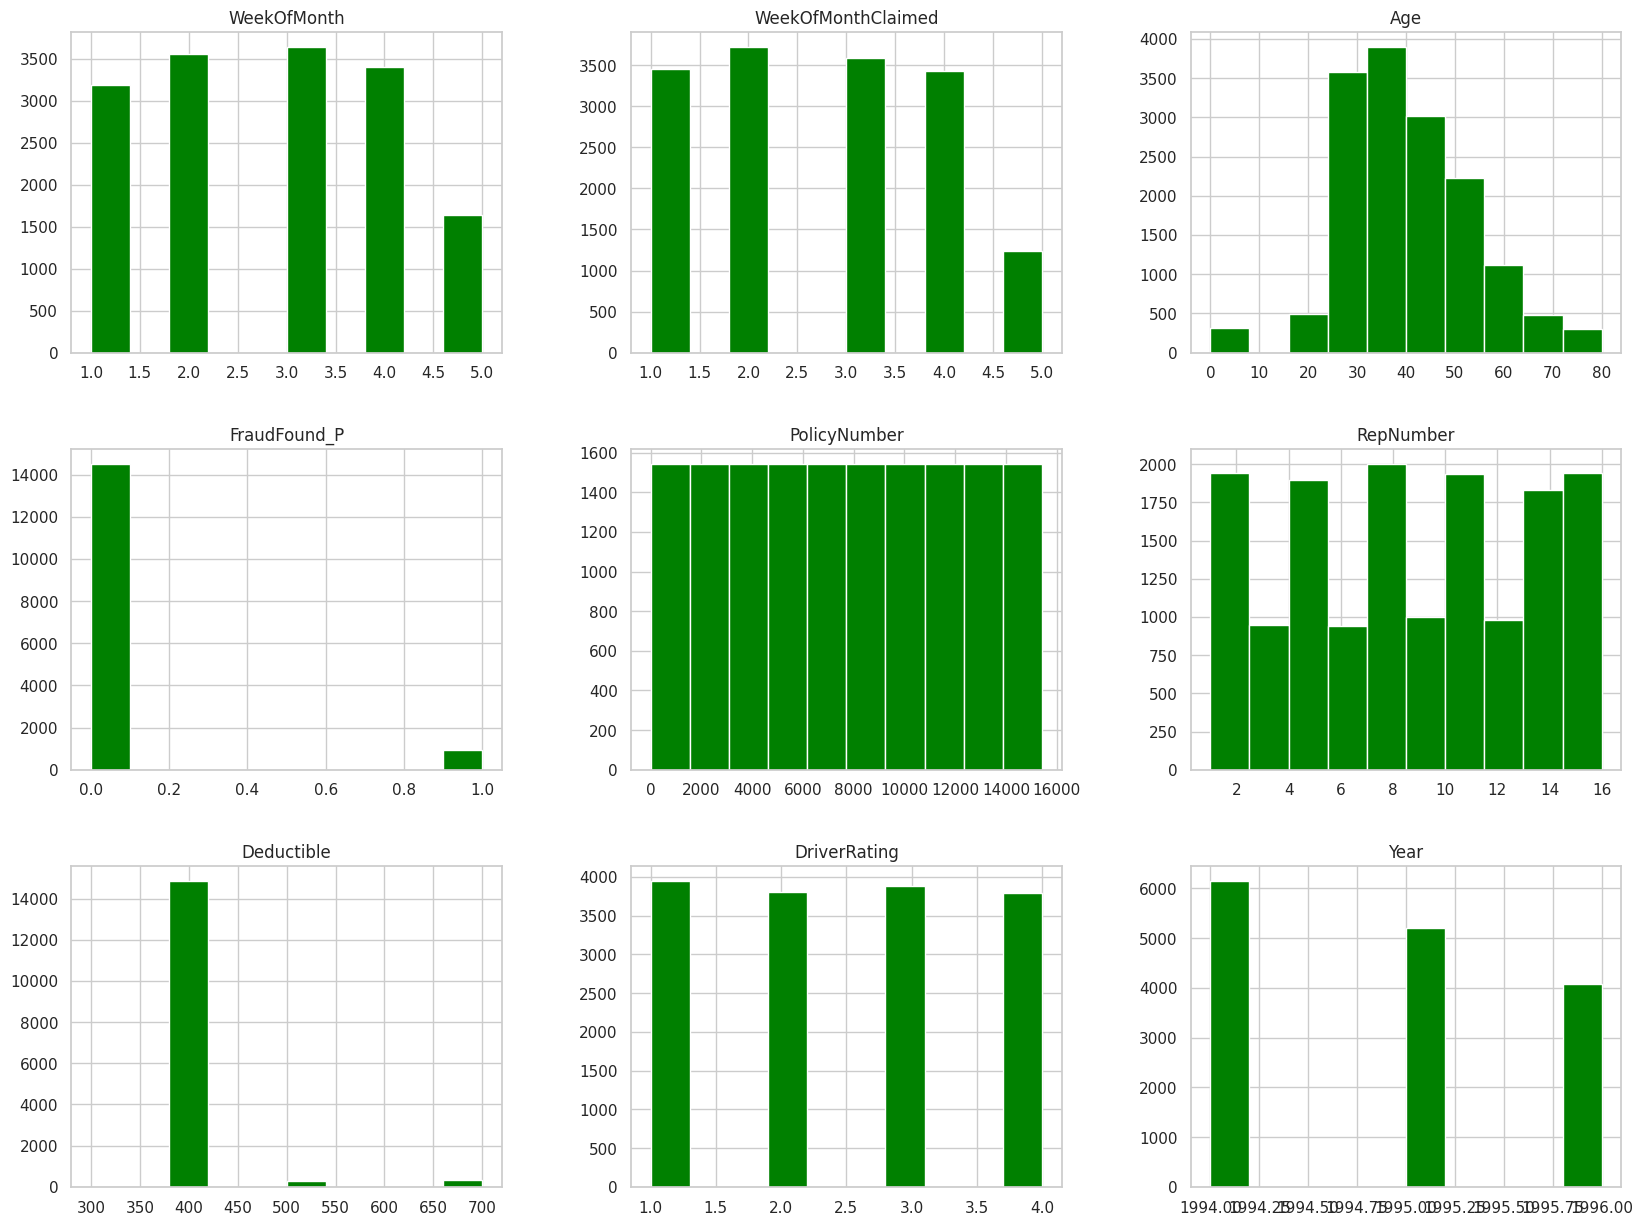

In [ ]:
df.hist(figsize=(20,15),color='green')

<ipython-input-53-9017dbf800b7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


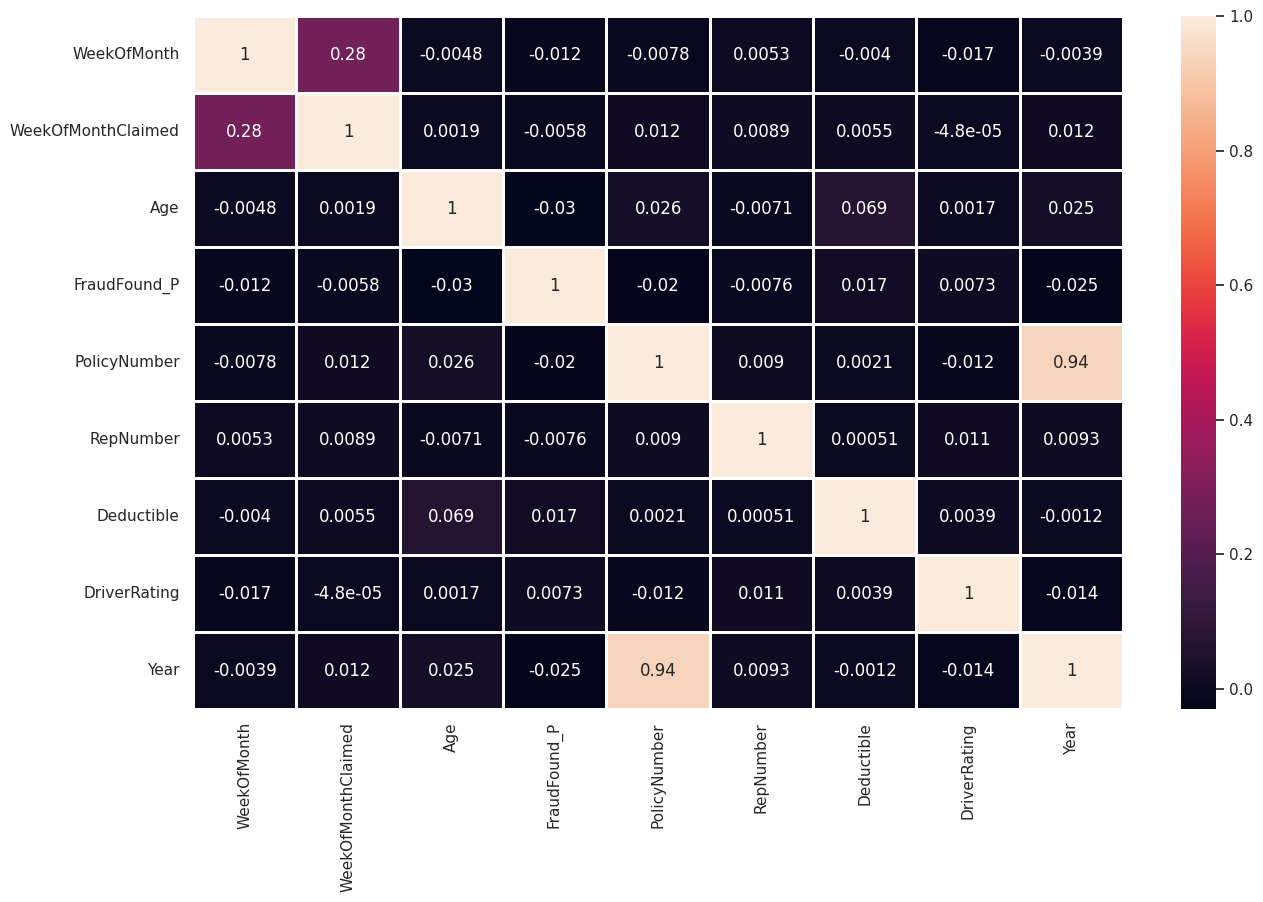

In [ ]:
plt.figure(figsize = (15,9))
corr = df.corr()
sns.heatmap(data = corr, annot = True, fmt = '.2g', linewidth = 1)
plt.show()

In [ ]:
to_drop = ['PolicyNumber','RepNumber']

df.drop(to_drop, inplace = True, axis = 1)

In [ ]:
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21,Policy Holder,Sport - Liability,Sport,more than 69000,0,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34,Policy Holder,Sport - Collision,Sport,more than 69000,0,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,47,Policy Holder,Sport - Collision,Sport,more than 69000,0,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,65,Third Party,Sedan - Liability,Sport,20000 to 29000,0,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,27,Third Party,Sport - Collision,Sport,more than 69000,0,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


### **Data Preprocessing**

#### **Data Kategorik**

In [ ]:
X = df.drop('FraudFound_P', axis = 1)
Y = df['FraudFound_P']

In [ ]:
for col in df.select_dtypes(include='object').columns.tolist():
    print(df[col].value_counts(normalize=True)*100)
    print('\n')

Jan    9.150454
May    8.865110
Mar    8.819715
Jun    8.566796
Oct    8.463035
Dec    8.333333
Apr    8.300908
Feb    8.210117
Jul    8.151751
Sep    8.041505
Nov    7.788586
Aug    7.308690
Name: Month, dtype: float64


Monday       16.964981
Friday       15.856031
Tuesday      14.915694
Thursday     14.092088
Wednesday    14.001297
Saturday     12.853437
Sunday       11.316472
Name: DayOfWeek, dtype: float64


Pontiac      24.883268
Toyota       20.239948
Honda        18.164721
Mazda        15.265888
Chevrolet    10.901427
Accura        3.060960
Ford          2.918288
VW            1.835279
Dodge         0.706874
Saab          0.700389
Mercury       0.538262
Saturn        0.376135
Nisson        0.194553
BMW           0.097276
Jaguar        0.038911
Porche        0.032425
Mecedes       0.025940
Ferrari       0.012970
Lexus         0.006485
Name: Make, dtype: float64


Urban    89.636835
Rural    10.363165
Name: AccidentArea, dtype: float64


Monday       24.364462
Tuesday      21.887

In [ ]:
# Categorical Columns
df_kategori = X.select_dtypes(include = ['object'])

In [ ]:
df_kategori.head(10)

,Month,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,Sex,MaritalStatus,Fault,PolicyType,VehicleCategory,VehiclePrice,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,BasePolicy
0,Dec,Wednesday,Honda,Urban,Tuesday,Jan,Female,Single,Policy Holder,Sport - Liability,Sport,more than 69000,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,Liability
1,Jan,Wednesday,Honda,Urban,Monday,Jan,Male,Single,Policy Holder,Sport - Collision,Sport,more than 69000,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,Collision
2,Oct,Friday,Honda,Urban,Thursday,Nov,Male,Married,Policy Holder,Sport - Collision,Sport,more than 69000,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,Collision
3,Jun,Saturday,Toyota,Rural,Friday,Jul,Male,Married,Third Party,Sedan - Liability,Sport,20000 to 29000,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,Liability
4,Jan,Monday,Honda,Urban,Tuesday,Feb,Female,Single,Third Party,Sport - Collision,Sport,more than 69000,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,Collision
5,Oct,Friday,Honda,Urban,Wednesday,Nov,Male,Single,Third Party,Sport - Collision,Sport,more than 69000,more than 30,more than 30,none,5 years,21 to 25,No,No,External,3 to 5,no change,1 vehicle,Collision
6,Feb,Saturday,Honda,Urban,Monday,Feb,Male,Married,Third Party,Sport - Collision,Sport,more than 69000,more than 30,more than 30,1,7 years,36 to 40,No,No,External,1 to 2,no change,1 vehicle,Collision
7,Nov,Friday,Honda,Urban,Tuesday,Mar,Male,Single,Policy Holder,Sport - Collision,Sport,more than 69000,more than 30,more than 30,1,new,16 to 17,No,No,External,none,no change,1 vehicle,Collision
8,Dec,Saturday,Honda,Urban,Wednesday,Dec,Male,Single,Policy Holder,Sport - Collision,Sport,more than 69000,more than 30,more than 30,none,6 years,31 to 35,No,Yes,External,3 to 5,no change,1 vehicle,Collision
9,Apr,Tuesday,Ford,Urban,Wednesday,Apr,Male,Married,Policy Holder,Utility - All Perils,Utility,more than 69000,more than 30,more than 30,2 to 4,more than 7,36 to 40,No,No,External,3 to 5,no change,1 vehicle,All Perils


In [ ]:
# Mengambil nama-nama variabel dari masing-masing kategori
for col in df_kategori.columns:
    print(f"{col}: \n{df_kategori[col].unique()}\n")

Month: 
['Dec' 'Jan' 'Oct' 'Jun' 'Feb' 'Nov' 'Apr' 'Mar' 'Aug' 'Jul' 'May' 'Sep']

DayOfWeek: 
['Wednesday' 'Friday' 'Saturday' 'Monday' 'Tuesday' 'Sunday' 'Thursday']

Make: 
['Honda' 'Toyota' 'Ford' 'Mazda' 'Chevrolet' 'Pontiac' 'Accura' 'Dodge'
 'Mercury' 'Jaguar' 'Nisson' 'VW' 'Saab' 'Saturn' 'Porche' 'BMW' 'Mecedes'
 'Ferrari' 'Lexus']

AccidentArea: 
['Urban' 'Rural']

DayOfWeekClaimed: 
['Tuesday' 'Monday' 'Thursday' 'Friday' 'Wednesday' 'Saturday' 'Sunday'
 '0']

MonthClaimed: 
['Jan' 'Nov' 'Jul' 'Feb' 'Mar' 'Dec' 'Apr' 'Aug' 'May' 'Jun' 'Sep' 'Oct'
 '0']

Sex: 
['Female' 'Male']

MaritalStatus: 
['Single' 'Married' 'Widow' 'Divorced']

Fault: 
['Policy Holder' 'Third Party']

PolicyType: 
['Sport - Liability' 'Sport - Collision' 'Sedan - Liability'
 'Utility - All Perils' 'Sedan - All Perils' 'Sedan - Collision'
 'Utility - Collision' 'Utility - Liability' 'Sport - All Perils']

VehicleCategory: 
['Sport' 'Utility' 'Sedan']

VehiclePrice: 
['more than 69000' '20000 to 29000' '

In [ ]:
df_kategori = pd.get_dummies(df_kategori, drop_first = True)

In [ ]:
df_kategori.head(10)

,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday,Make_BMW,Make_Chevrolet,Make_Dodge,Make_Ferrari,Make_Ford,Make_Honda,Make_Jaguar,Make_Lexus,Make_Mazda,Make_Mecedes,Make_Mercury,Make_Nisson,Make_Pontiac,Make_Porche,Make_Saab,Make_Saturn,Make_Toyota,Make_VW,AccidentArea_Urban,DayOfWeekClaimed_Friday,DayOfWeekClaimed_Monday,DayOfWeekClaimed_Saturday,DayOfWeekClaimed_Sunday,DayOfWeekClaimed_Thursday,DayOfWeekClaimed_Tuesday,DayOfWeekClaimed_Wednesday,MonthClaimed_Apr,MonthClaimed_Aug,MonthClaimed_Dec,MonthClaimed_Feb,MonthClaimed_Jan,MonthClaimed_Jul,MonthClaimed_Jun,MonthClaimed_Mar,MonthClaimed_May,MonthClaimed_Nov,MonthClaimed_Oct,MonthClaimed_Sep,Sex_Male,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widow,Fault_Third Party,PolicyType_Sedan - Collision,PolicyType_Sedan - Liability,PolicyType_Sport - All Perils,PolicyType_Sport - Collision,PolicyType_Sport - Liability,PolicyType_Utility - All Perils,PolicyType_Utility - Collision,PolicyType_Utility - Liability,VehicleCategory_Sport,VehicleCategory_Utility,VehiclePrice_30000 to 39000,VehiclePrice_40000 to 59000,VehiclePrice_60000 to 69000,VehiclePrice_less than 20000,VehiclePrice_more than 69000,Days_Policy_Accident_15 to 30,Days_Policy_Accident_8 to 15,Days_Policy_Accident_more than 30,Days_Policy_Accident_none,Days_Policy_Claim_8 to 15,Days_Policy_Claim_more than 30,Days_Policy_Claim_none,PastNumberOfClaims_2 to 4,PastNumberOfClaims_more than 4,PastNumberOfClaims_none,AgeOfVehicle_3 years,AgeOfVehicle_4 years,AgeOfVehicle_5 years,AgeOfVehicle_6 years,AgeOfVehicle_7 years,AgeOfVehicle_more than 7,AgeOfVehicle_new,AgeOfPolicyHolder_18 to 20,AgeOfPolicyHolder_21 to 25,AgeOfPolicyHolder_26 to 30,AgeOfPolicyHolder_31 to 35,AgeOfPolicyHolder_36 to 40,AgeOfPolicyHolder_41 to 50,AgeOfPolicyHolder_51 to 65,AgeOfPolicyHolder_over 65,PoliceReportFiled_Yes,WitnessPresent_Yes,AgentType_Internal,NumberOfSuppliments_3 to 5,NumberOfSuppliments_more than 5,NumberOfSuppliments_none,AddressChange_Claim_2 to 3 years,AddressChange_Claim_4 to 8 years,AddressChange_Claim_no change,AddressChange_Claim_under 6 months,NumberOfCars_2 vehicles,NumberOfCars_3 to 4,NumberOfCars_5 to 8,NumberOfCars_more than 8,BasePolicy_Collision,BasePolicy_Liability
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
4,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
6,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,

#### **Data Numerik**

In [ ]:
# Mengambil kolum berisi data numerik
df_numerik = X.select_dtypes(include = ['int64','float64'])

In [ ]:
df_numerik.head()

,WeekOfMonth,WeekOfMonthClaimed,Age,Deductible,DriverRating,Year
0,5,1,21,300,1,1994
1,3,4,34,400,4,1994
2,5,2,47,400,3,1994
3,2,1,65,400,2,1994
4,5,2,27,400,1,1994


#### **Menggabungkan Data Numerik dan Kategorik**

In [ ]:
X = pd.concat([df_numerik, df_kategori], axis = 1)

In [ ]:
X.head(10)

,WeekOfMonth,WeekOfMonthClaimed,Age,Deductible,DriverRating,Year,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday,Make_BMW,Make_Chevrolet,Make_Dodge,Make_Ferrari,Make_Ford,Make_Honda,Make_Jaguar,Make_Lexus,Make_Mazda,Make_Mecedes,Make_Mercury,Make_Nisson,Make_Pontiac,Make_Porche,Make_Saab,Make_Saturn,Make_Toyota,Make_VW,AccidentArea_Urban,DayOfWeekClaimed_Friday,DayOfWeekClaimed_Monday,DayOfWeekClaimed_Saturday,DayOfWeekClaimed_Sunday,DayOfWeekClaimed_Thursday,DayOfWeekClaimed_Tuesday,DayOfWeekClaimed_Wednesday,MonthClaimed_Apr,MonthClaimed_Aug,MonthClaimed_Dec,MonthClaimed_Feb,MonthClaimed_Jan,MonthClaimed_Jul,MonthClaimed_Jun,MonthClaimed_Mar,MonthClaimed_May,MonthClaimed_Nov,MonthClaimed_Oct,MonthClaimed_Sep,Sex_Male,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widow,Fault_Third Party,PolicyType_Sedan - Collision,PolicyType_Sedan - Liability,PolicyType_Sport - All Perils,PolicyType_Sport - Collision,PolicyType_Sport - Liability,PolicyType_Utility - All Perils,PolicyType_Utility - Collision,PolicyType_Utility - Liability,VehicleCategory_Sport,VehicleCategory_Utility,VehiclePrice_30000 to 39000,VehiclePrice_40000 to 59000,VehiclePrice_60000 to 69000,VehiclePrice_less than 20000,VehiclePrice_more than 69000,Days_Policy_Accident_15 to 30,Days_Policy_Accident_8 to 15,Days_Policy_Accident_more than 30,Days_Policy_Accident_none,Days_Policy_Claim_8 to 15,Days_Policy_Claim_more than 30,Days_Policy_Claim_none,PastNumberOfClaims_2 to 4,PastNumberOfClaims_more than 4,PastNumberOfClaims_none,AgeOfVehicle_3 years,AgeOfVehicle_4 years,AgeOfVehicle_5 years,AgeOfVehicle_6 years,AgeOfVehicle_7 years,AgeOfVehicle_more than 7,AgeOfVehicle_new,AgeOfPolicyHolder_18 to 20,AgeOfPolicyHolder_21 to 25,AgeOfPolicyHolder_26 to 30,AgeOfPolicyHolder_31 to 35,AgeOfPolicyHolder_36 to 40,AgeOfPolicyHolder_41 to 50,AgeOfPolicyHolder_51 to 65,AgeOfPolicyHolder_over 65,PoliceReportFiled_Yes,WitnessPresent_Yes,AgentType_Internal,NumberOfSuppliments_3 to 5,NumberOfSuppliments_more than 5,NumberOfSuppliments_none,AddressChange_Claim_2 to 3 years,AddressChange_Claim_4 to 8 years,AddressChange_Claim_no change,AddressChange_Claim_under 6 months,NumberOfCars_2 vehicles,NumberOfCars_3 to 4,NumberOfCars_5 to 8,NumberOfCars_more than 8,BasePolicy_Collision,BasePolicy_Liability
0,5,1,21,300,1,1994,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
1,3,4,34,400,4,1994,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
2,5,2,47,400,3,1994,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
3,2,1,65,400,2,1994,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
4,5,2,27,400,1,1994,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
5,4,1,20,400,3,1994,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
6,1,3,36,400,1,1994,0,0,1,0,0,

### **Standarisasi**

In [ ]:
df_numerik = X[['Age','Deductible','DriverRating']]

In [ ]:
from sklearn.preprocessing import StandardScaler

scal = StandardScaler()
scal_data = scal.fit_transform(df_numerik)

In [ ]:
scal_numerik_df= pd.DataFrame(data = scal_data, columns = df_numerik.columns, index = X.index)
scal_numerik_df.head()

,Age,Deductible,DriverRating
0,-1.397554,-2.450633,-1.329092
1,-0.434015,-0.175298,1.350875
2,0.529523,-0.175298,0.457553
3,1.863653,-0.175298,-0.435770
4,-0.952844,-0.175298,-1.329092


In [ ]:
X.drop(columns = scal_numerik_df.columns, inplace = True)
X = pd.concat([scal_numerik_df, X], axis = 1)
X.head()

,Age,Deductible,DriverRating,WeekOfMonth,WeekOfMonthClaimed,Year,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday,Make_BMW,Make_Chevrolet,Make_Dodge,Make_Ferrari,Make_Ford,Make_Honda,Make_Jaguar,Make_Lexus,Make_Mazda,Make_Mecedes,Make_Mercury,Make_Nisson,Make_Pontiac,Make_Porche,Make_Saab,Make_Saturn,Make_Toyota,Make_VW,AccidentArea_Urban,DayOfWeekClaimed_Friday,DayOfWeekClaimed_Monday,DayOfWeekClaimed_Saturday,DayOfWeekClaimed_Sunday,DayOfWeekClaimed_Thursday,DayOfWeekClaimed_Tuesday,DayOfWeekClaimed_Wednesday,MonthClaimed_Apr,MonthClaimed_Aug,MonthClaimed_Dec,MonthClaimed_Feb,MonthClaimed_Jan,MonthClaimed_Jul,MonthClaimed_Jun,MonthClaimed_Mar,MonthClaimed_May,MonthClaimed_Nov,MonthClaimed_Oct,MonthClaimed_Sep,Sex_Male,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widow,Fault_Third Party,PolicyType_Sedan - Collision,PolicyType_Sedan - Liability,PolicyType_Sport - All Perils,PolicyType_Sport - Collision,PolicyType_Sport - Liability,PolicyType_Utility - All Perils,PolicyType_Utility - Collision,PolicyType_Utility - Liability,VehicleCategory_Sport,VehicleCategory_Utility,VehiclePrice_30000 to 39000,VehiclePrice_40000 to 59000,VehiclePrice_60000 to 69000,VehiclePrice_less than 20000,VehiclePrice_more than 69000,Days_Policy_Accident_15 to 30,Days_Policy_Accident_8 to 15,Days_Policy_Accident_more than 30,Days_Policy_Accident_none,Days_Policy_Claim_8 to 15,Days_Policy_Claim_more than 30,Days_Policy_Claim_none,PastNumberOfClaims_2 to 4,PastNumberOfClaims_more than 4,PastNumberOfClaims_none,AgeOfVehicle_3 years,AgeOfVehicle_4 years,AgeOfVehicle_5 years,AgeOfVehicle_6 years,AgeOfVehicle_7 years,AgeOfVehicle_more than 7,AgeOfVehicle_new,AgeOfPolicyHolder_18 to 20,AgeOfPolicyHolder_21 to 25,AgeOfPolicyHolder_26 to 30,AgeOfPolicyHolder_31 to 35,AgeOfPolicyHolder_36 to 40,AgeOfPolicyHolder_41 to 50,AgeOfPolicyHolder_51 to 65,AgeOfPolicyHolder_over 65,PoliceReportFiled_Yes,WitnessPresent_Yes,AgentType_Internal,NumberOfSuppliments_3 to 5,NumberOfSuppliments_more than 5,NumberOfSuppliments_none,AddressChange_Claim_2 to 3 years,AddressChange_Claim_4 to 8 years,AddressChange_Claim_no change,AddressChange_Claim_under 6 months,NumberOfCars_2 vehicles,NumberOfCars_3 to 4,NumberOfCars_5 to 8,NumberOfCars_more than 8,BasePolicy_Collision,BasePolicy_Liability
0,-1.397554,-2.450633,-1.329092,5,1,1994,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
1,-0.434015,-0.175298,1.350875,3,4,1994,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
2,0.529523,-0.175298,0.457553,5,2,1994,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
3,1.863653,-0.175298,-0.435770,2,1,1994,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
4,-0.952844,-0.175298,-1.329092,5,2,1994,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0


<ipython-input-71-1b89f929e6c3>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[col])
<ipython-input-71-1b89f929e6c3>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[col])
<ipython-input-71-1b89f929e6c3>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v

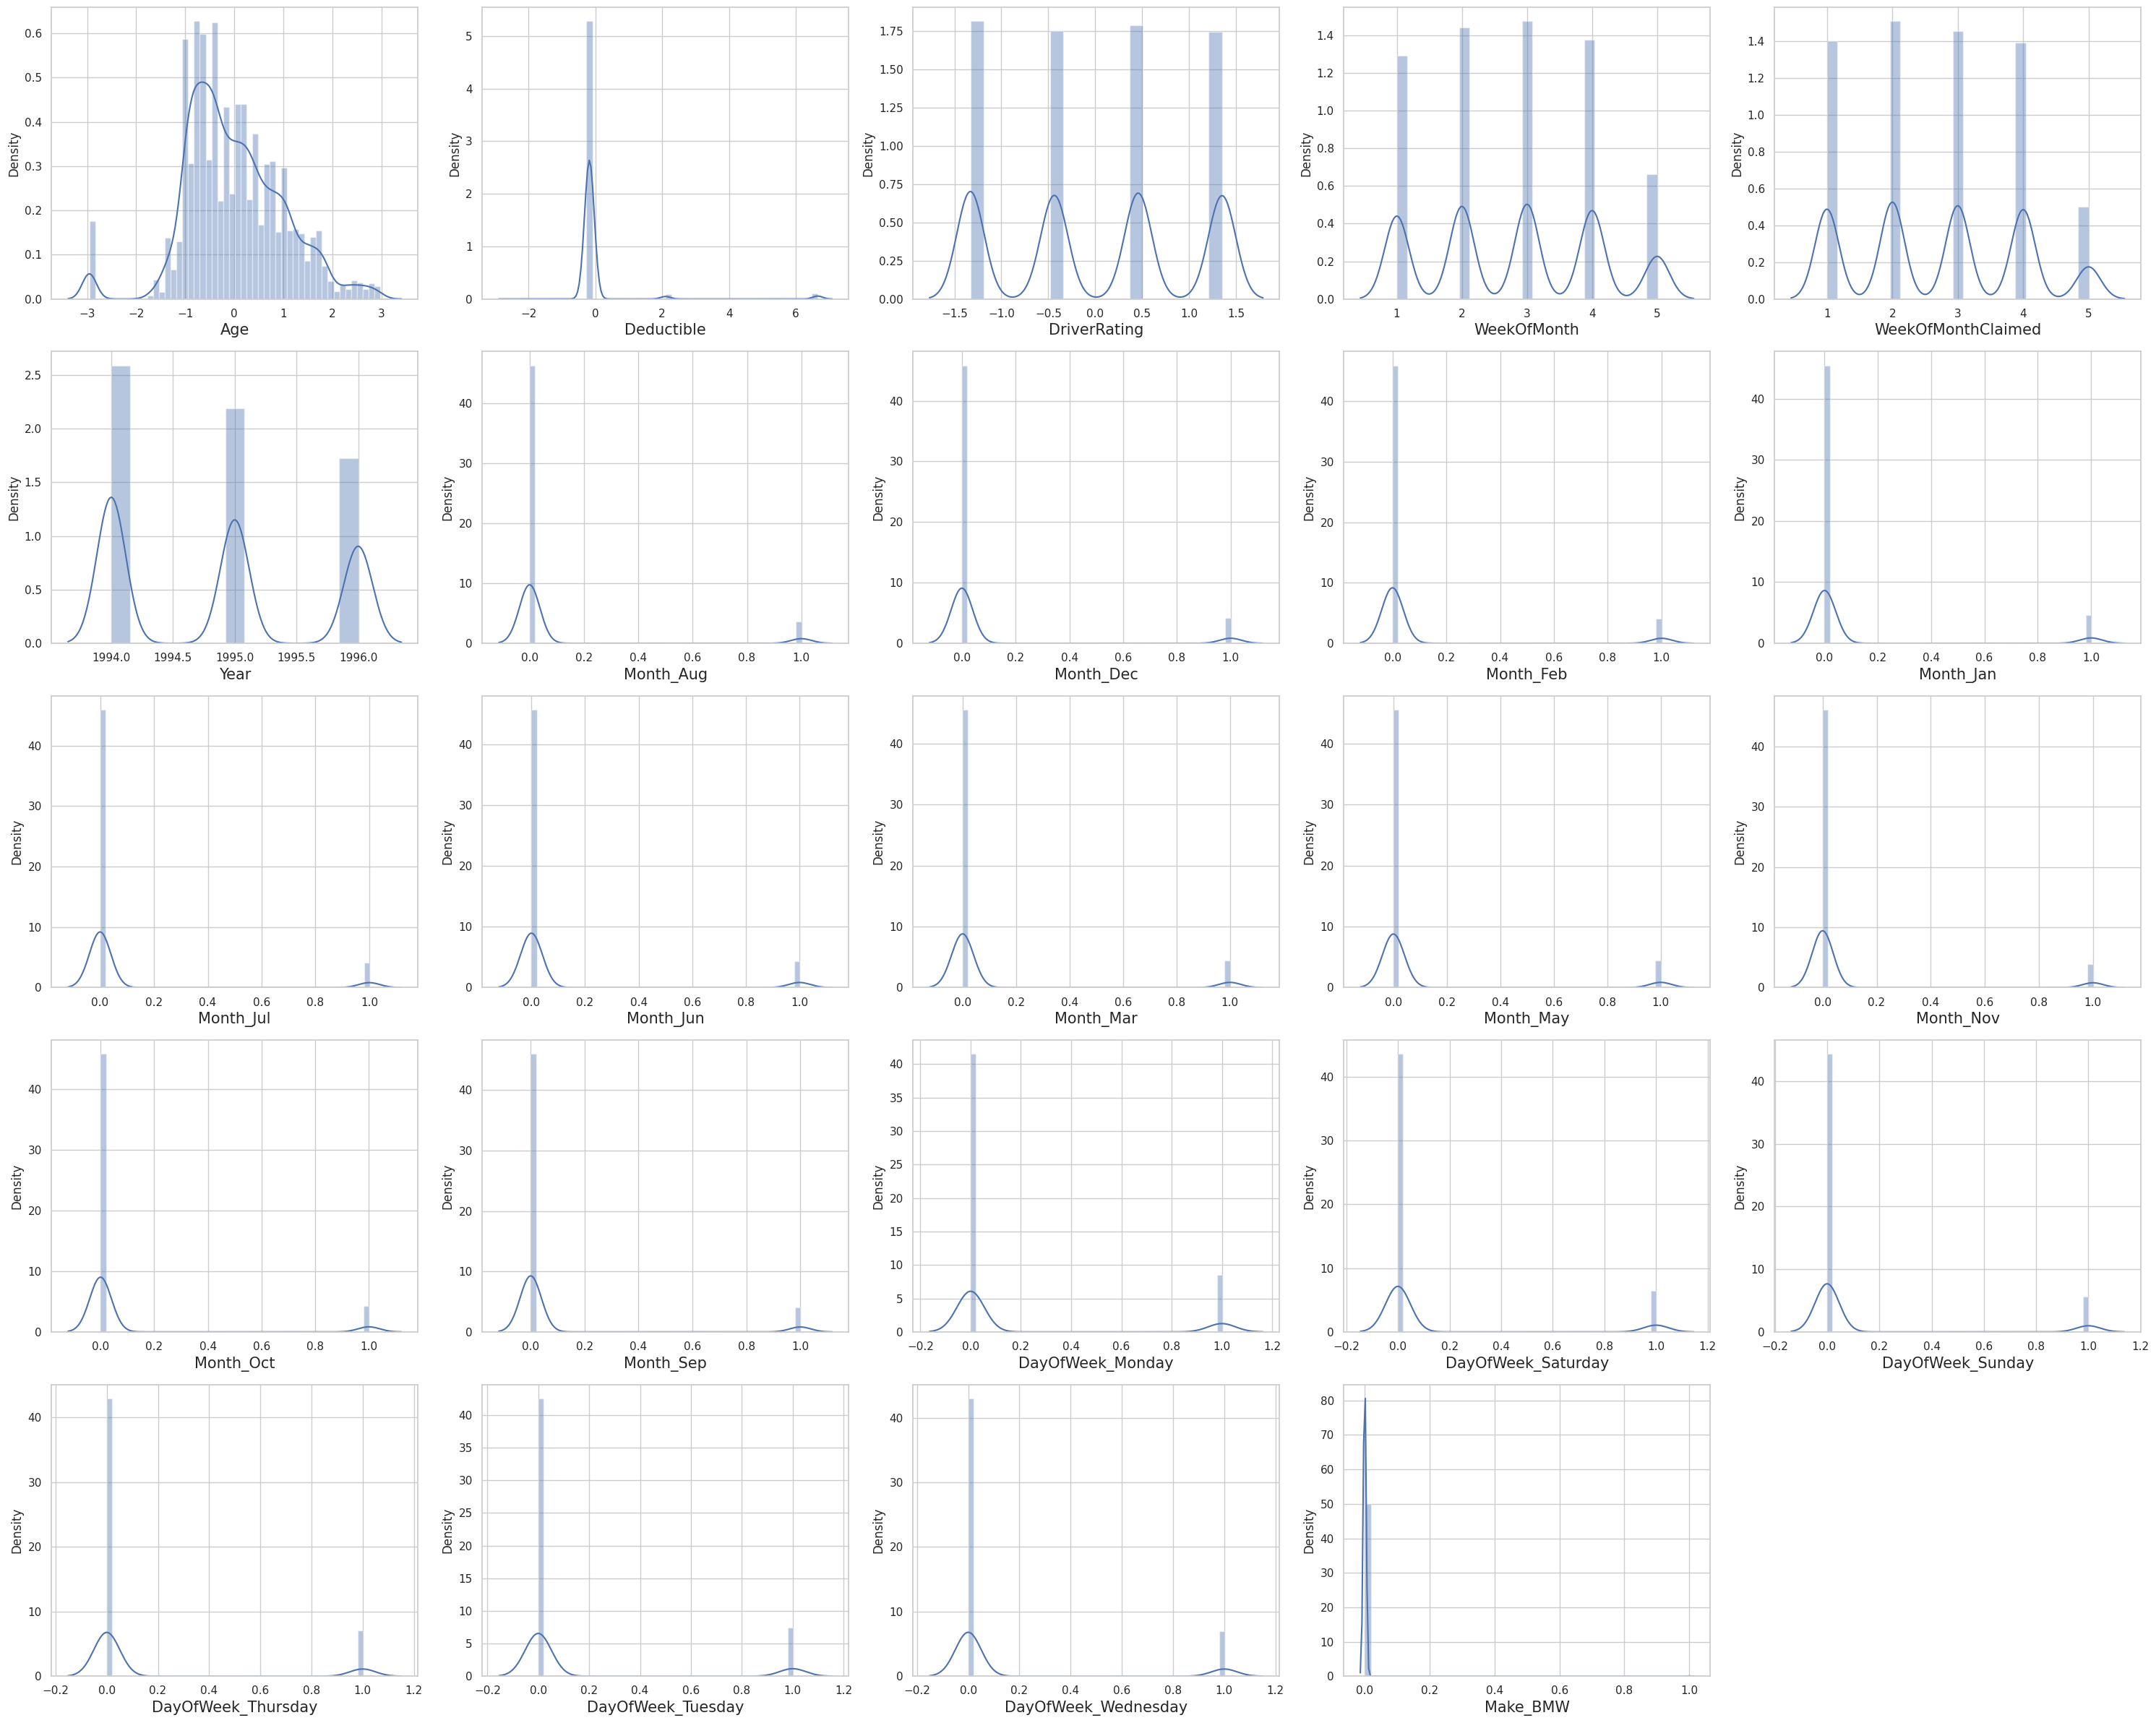

In [ ]:
plt.figure(figsize = (30, 24))
plotnumber = 1

for col in X.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.distplot(X[col])
        plt.xlabel(col, fontsize = 15)

    plotnumber += 1

plt.tight_layout()
plt.show()

#### **Deteksi Outlier**

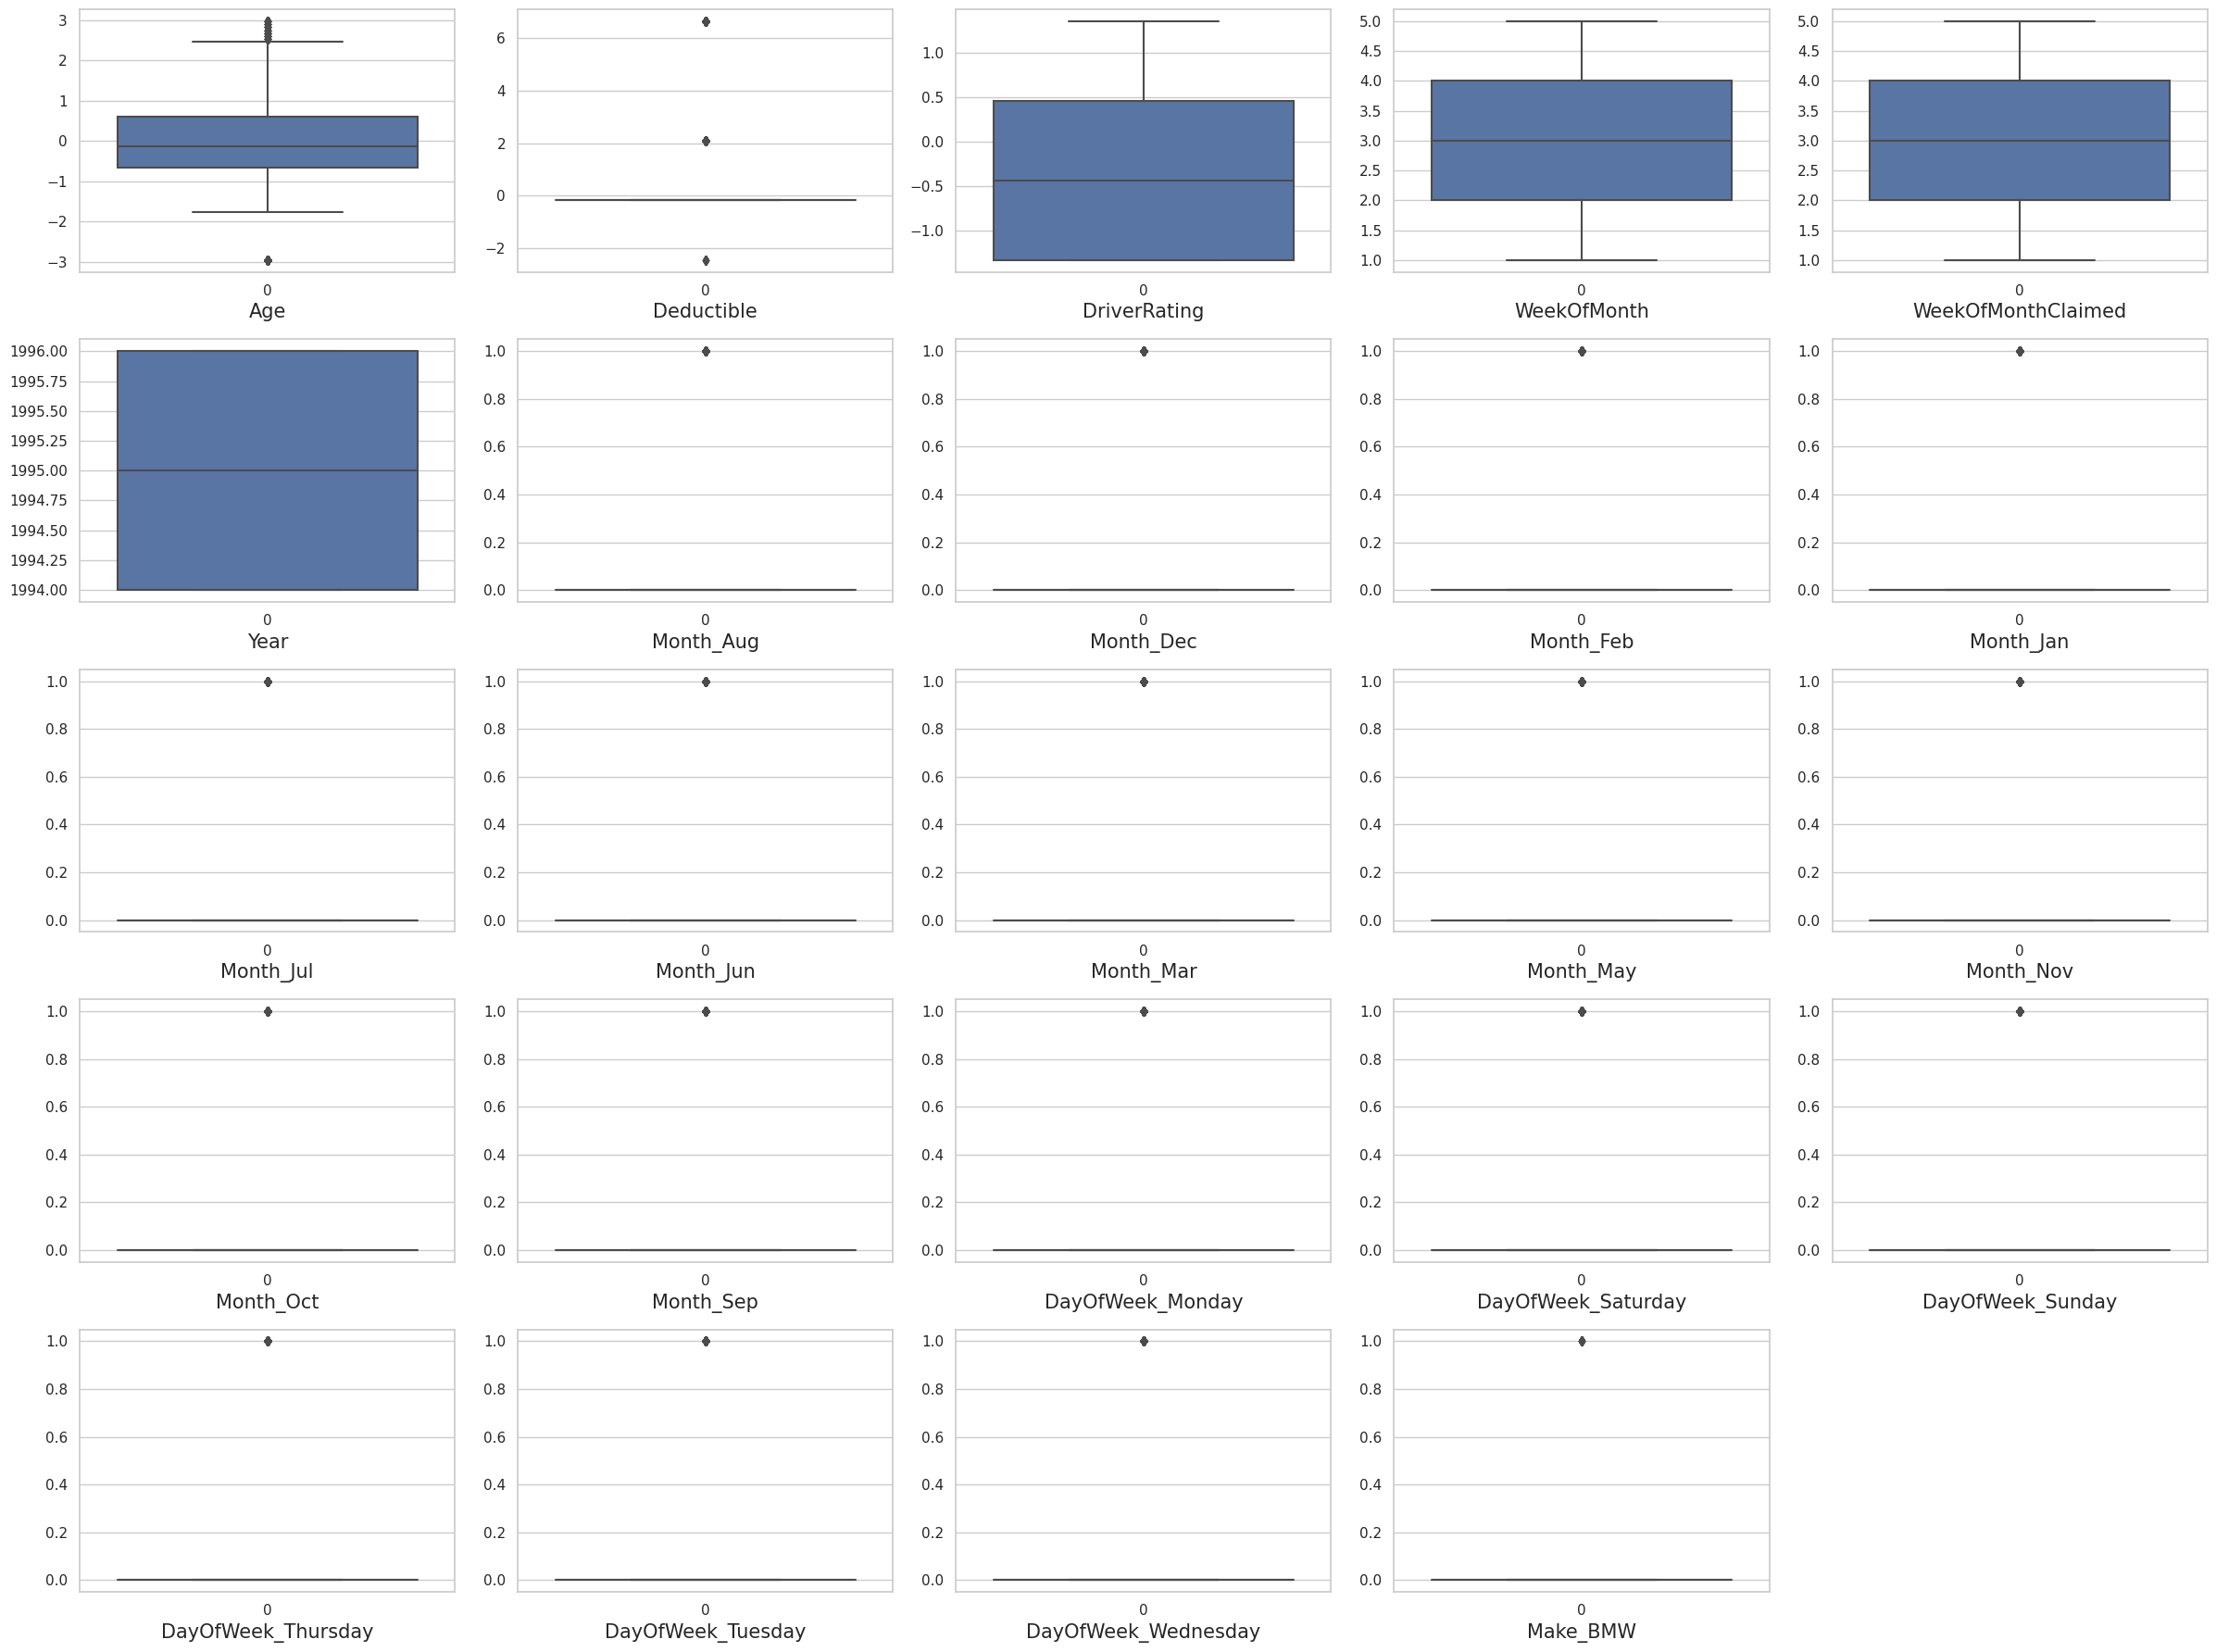

In [ ]:
plt.figure(figsize = (24, 18))
plotnumber = 1

for col in X.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.boxplot(X[col])
        plt.xlabel(col, fontsize = 15)

    plotnumber += 1
plt.tight_layout()
plt.show()

#### **Train Test Split dan Persiapan Model**

In [ ]:
# Memisahkan data menjadi data training dan data tes

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size= 0.7)

In [ ]:
X_train

In [ ]:
Y_train

In [ ]:
X_test

In [ ]:
Y_test

#### **Balancing Data Menggunakan Teknik SMOTE**

In [ ]:
from imblearn.over_sampling import SMOTE
OS_SMOTE = SMOTE()
X_train, Y_train = OS_SMOTE.fit_resample(X_train,Y_train)

In [ ]:
oversample_plot = Y_train.value_counts().reset_index()
oversample_plot.columns = ['Labels','FraudFound_P']
print(oversample_plot)
sns.barplot(x='Labels',y='FraudFound_P',data=oversample_plot);
plt.title('Perbandingan Setelah Upsampling');

#### **Mengatasi Overfitting Menggunakan Principal Component Anaylsis (PCA)**

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.ticker as mtick
import matplotlib as mpl

pca = PCA()
pca.fit(X_train)

cumsum = np.cumsum(pca.explained_variance_ratio_)*100
d = [n for n in range(len(cumsum))]

# Visualize
fig, ax = plt.subplots(figsize =(10, 10))
fig.patch.set_facecolor('white')
mpl.rcParams['font.family'] = 'Ubuntu'
mpl.rcParams['font.size'] = 14

ax.plot(d,cumsum, color = '#00538F', label='Cumulative Explained Variance')

ax.axhline(y = 95, color='black', linestyle=':', label = '95% Explained Variance')
ax.legend(loc='best')

# Remove ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Remove axes splines
for i in ['top','right']:
    ax.spines[i].set_visible(False)

# Set percentages
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# annotation arrow
arrowprops = dict(arrowstyle="->", connectionstyle="angle3,angleA=0,angleB=-90")
plt.annotate('Principal Component Number 19',
             xy=(19, 95),
             xytext=(19+5, 95+10),
             arrowprops=arrowprops,
             size = 14)

plt.legend(bbox_to_anchor = (1, 0.2))

plt.suptitle('Explained Variance vs Dimensions', size=26)
plt.ylabel('Cumulative Explained Variance')
plt.xlabel('PC');

### **Pembuatan Model**

#### **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)

Y_pred = dtc.predict(X_test)

In [ ]:
# Mencari akurasi, confusion matriks dari model tersebut dan hasil klasifikasi

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

dtc_train_acc = accuracy_score(Y_train, dtc.predict(X_train))
dtc_test_acc = accuracy_score(Y_test, Y_pred)

print(f"Training accuracy of Decision Tree is : {dtc_train_acc}")
print(f"Test accuracy of Decision Tree is : {dtc_test_acc}")

print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

In [ ]:
# Pengubahan hyper parameter

from sklearn.model_selection import GridSearchCV

grid_params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'min_samples_split' : range(2, 10, 1),
    'min_samples_leaf' : range(2, 10, 1)
}

grid_search = GridSearchCV(dtc, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, Y_train)

In [ ]:
# Parameter dan skor terbaik

print(grid_search.best_params_)
print(grid_search.best_score_)

In [ ]:
# Estimator Terbaik
dtc = grid_search.best_estimator_
Y_pred = dtc.predict(X_test)



In [ ]:
# Mencari skor akurasi, matriks confusion dan hasil klasifikasi

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
dtc_train_acc = accuracy_score(Y_train, dtc.predict(X_train))
dtc_test_acc = accuracy_score(Y_test, Y_pred)
print(f"Training accuracy of Decision Tree is : {dtc_train_acc}")
print(f"Test accuracy of Decision Tree is : {dtc_test_acc}")
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

#### **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rand_clf = RandomForestClassifier(criterion= 'entropy',
                                  max_depth= 10,
                                  max_features= 'sqrt',
                                  min_samples_leaf= 1,
                                  min_samples_split= 3,
                                  n_estimators= 140)
rand_clf.fit(X_train, Y_train)
Y_pred = rand_clf.predict(X_test)

In [ ]:
rand_feature_importance = rand_clf.feature_importances_
rand_feature_importance

In [ ]:
# Mencari akurasi, confusion matriks dari model tersebut dan hasil klasifikasi

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
rand_clf_train_acc = accuracy_score(Y_train, rand_clf.predict(X_train))
rand_clf_test_acc = accuracy_score(Y_test, Y_pred)
print(f"Training accuracy of Random Forest is : {rand_clf_train_acc}")
print(f"Test accuracy of Random Forest is : {rand_clf_test_acc}")
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

#### **Extra Trees**

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()
etc.fit(X_train, Y_train)

# Mencari akurasi, confusion matriks dari model tersebut dan hasil klasifikasi

etc_acc = accuracy_score(Y_test, etc.predict(X_test))
print(f"Training Accuracy of Extra Trees Classifier is {accuracy_score(Y_train, etc.predict(X_train))}")
print(f"Test Accuracy of Extra Trees Classifier is {etc_acc} \n")
print(f"Confusion Matrix :- \n{confusion_matrix(Y_test, etc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(Y_test, etc.predict(X_test))}")

#### **Support Vector Classifier**

In [ ]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, Y_train)

Y_pred = svc.predict(X_test)

# Mencari akurasi, confusion matriks dari model tersebut dan hasil klasifikasi

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

svc_train_acc = accuracy_score(Y_train, svc.predict(X_train))
svc_test_acc = accuracy_score(Y_test, Y_pred)

print(f"Training accuracy of Support Vector Classifier is : {svc_train_acc}")
print(f"Test accuracy of Support Vector Classifier is : {svc_test_acc}")

print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

#### **Gradient Boost**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train, Y_train)

# Mencari akurasi, confusion matriks dari model tersebut dan hasil klasifikasi

gb_acc = accuracy_score(Y_test, gb.predict(X_test))

print(f"Training Accuracy of Gradient Boosting Classifier is {accuracy_score(Y_train, gb.predict(X_train))}")
print(f"Test Accuracy of Gradient Boosting Classifier is {gb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(Y_test, gb.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(Y_test, gb.predict(X_test))}")

#### **XG Boost**

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, Y_train)

Y_pred = xgb.predict(X_test)

# Mencari akurasi, confusion matriks dari model tersebut dan hasil klasifikasi

xgb_train_acc = accuracy_score(Y_train, xgb.predict(X_train))
xgb_test_acc = accuracy_score(Y_test, Y_pred)

print(f"Training accuracy of XgBoost is : {xgb_train_acc}")
print(f"Test accuracy of XgBoost is : {xgb_test_acc}")

print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

### **Perbandingan Model**

In [ ]:
banding_model = pd.DataFrame({
    'Model' : ['Decision Tree','Random Forest','Extra Trees','Support Vector Classfier','Gradient Boost','XG Boost'],
    'Score' : [dtc_test_acc,rand_clf_test_acc,etc_acc,svc_test_acc,gb_acc,xgb_test_acc]
})


banding_model.sort_values(by = 'Score', ascending = False)

In [ ]:
import plotly.express as px

px.bar(data_frame = banding_model, x = 'Score', y = 'Model', color = 'Score', template = 'plotly_dark',
       title = 'Perbandingan Model')

In [ ]:
import plotly.express as px

fig = px.bar(data_frame=banding_model, x='Score', y='Model', color='Score', template='plotly_dark',
             title='Perbandingan Model', text='Score',  # specify the 'Score' column as text
             labels={'Score': 'Score', 'Model': 'Model'})

# Format the text to display as percentage out of 100 with 2 decimal places
fig.update_traces(texttemplate='%{text:.2%}', textposition='outside')

# Show the figure
fig.show()

### **Cek Feature Importance**

In [ ]:
# XGB
# Get feature importances
feature_importance_xgb = xgb.feature_importances_
# Create a DataFrame with feature names and their importance scores
feature_importance_df_xgb = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance_xgb})
# Sort the DataFrame by importance scores in descending order
feature_importance_df_xgb = feature_importance_df_xgb.sort_values(by='Importance', ascending=False)

# Display the most important features
print(feature_importance_df_xgb)

In [ ]:
# Extra Trees
# Get feature importances
feature_importance_etc = etc.feature_importances_
# Create a DataFrame with feature names and their importance scores
feature_importance_df_etc = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance_etc})
# Sort the DataFrame by importance scores in descending order
feature_importance_df_etc = feature_importance_df_etc.sort_values(by='Importance', ascending=False)

# Display the most important features
print(feature_importance_df_etc)

In [ ]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Ubuntu'
PartialDependenceDisplay.from_estimator(etc, features=[0, 120], X=X_train, grid_resolution=50, percentiles=(0.5, 1))

In [ ]:
import shap

# Train a model (replace your_model with your chosen algorithm)
#model = etc()
#model.fit(X_train, y_train)

# Create a SHAP explainer
#explainer = shap.Explainer(model)
#shap_values = explainer.shap_values(X_test)
